<h1>Model training</h1>
<h3>First we read the data</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./database/database_C1'.csv", sep=',', index_col=0)

In [3]:
#since it is written as strings we need to change the format 
for column in data.columns:
    data[column] = data[column].apply(lambda x: np.array(list(map(float, x.split(',')))))
data['class'] = 1
data

,N1,N2,N3,N4,N5,N6,class
0,"[72.379, 32.575, 10.796]","[77.895, 33.755, 9.769]","[84.753, 31.765, 9.188]","[84.547, 36.507, 11.124]","[82.675, 41.303, 11.068]","[78.004, 41.475, 11.663]",1
1,"[14.263, 65.819, 16.505]","[12.633, 71.007, 16.327]","[8.943, 76.9, 18.215]","[7.04, 76.843, 13.362]","[8.532, 76.432, 8.41]","[11.439, 72.111, 8.645]",1
2,"[54.509, 39.342, 49.313]","[60.011, 39.781, 49.868]","[66.82, 38.868, 48.066]","[67.582, 37.195, 52.963]","[65.914, 38.341, 58.251]","[61.112, 38.748, 57.643]",1
3,"[2.716, 78.732, 56.751]","[1.84, 82.233, 60.059]","[-1.302, 89.045, 61.814]","[2.221, 90.716, 58.883]","[8.213, 91.183, 58.757]","[9.909, 85.912, 58.753]",1
4,"[13.564, 1.567, 34.626]","[17.065, 3.703, 38.174]","[20.272, 6.608, 44.34]","[24.028, 9.055, 40.759]","[27.216, 8.24, 36.398]","[23.132, 5.894, 33.628]",1
...,...,...,...,...,...,...,...
244,"[90.13, -27.415, -13.33]","[88.613, -27.251, -18.576]","[86.9, -22.725, -24.629]","[83.582, -26.819, -24.172]","[81.266, -31.551, -23.335]","[82.567, -32.633, -18.651]",1
245,"[99.603, -27.307, -86.447]","[98.735, -25.749, -91.736]","[101.652, -24.045, -98.223]","[98.279, -20.815, -96.961]","[94.253, -17.913, -95.312]","[93.081, -20.084, -90.57]",1
246,"[12.82, -40.452, 49.71]","[13.097, -36.791, 45.491]","[9.362, -32.846, 40.475]","[13.796, -34.92, 38.285]","[18.834, -36.739, 37.041]","[19.426, -39.836, 41.043]",1
247,"[85.871, -113.233, -36.136]","[88.489, -108.437, -35.794]","[94.064, -104.485, -32.355]","[90.002, -101.396, -32.8]","[85.863, -98.73, -35.114]","[82.935, -103.078, -36.044]",1


In [4]:
#stems
d1 = pd.read_csv("./stems_database_C1'.csv", sep=',', index_col=0)
for column in d1.columns[:-1]:
    d1[column] = d1[column].apply(lambda x: np.array(list(map(float, x.split(',')))))
d1 = d1.reset_index(drop=True)

#hairpins
d2 = pd.read_csv("./hairpins_database_C1'.csv", index_col=0, sep=',')
for column in d2.columns[:-1]:
    d2[column] = d2[column].apply(lambda x: np.array(list(map(float, x.split(',')))))
d2 = d2.reset_index(drop=True)
d2

#internal loops
d3 = pd.read_csv("./loops_database_C1'.csv", sep=',', index_col=0)
for column in d3.columns[:-1]:
    d3[column] = d3[column].apply(lambda x: np.array(list(map(float, x.split(',')))))
d3 = d3.reset_index(drop=True)
d3

#ends
d4 = pd.read_csv("./ends_database_C1'.csv", sep=',', index_col=0)
for column in d4.columns[:-1]:
    d4[column] = d4[column].apply(lambda x: np.array(list(map(float, x.split(',')))))
d4 = d4.reset_index(drop=True)
d4

#mix
d5 = pd.read_csv("./mix_database_C1'.csv", sep=',', index_col=0)
for column in d5.columns[:-1]:
    d5[column] = d5[column].apply(lambda x: np.array(list(map(float, x.split(',')))))
d5 = d5.reset_index(drop=True)
d5

#mix_with_seqs_assigned
d5v2 = pd.read_csv("./mix_database_C1_v2'.csv", sep=',', index_col=0)
for column in d5v2.columns[:-1]:
    d5v2[column] = d5v2[column].apply(lambda x: np.array(list(map(float, x.split(',')))))
d5v2 = d5v2.reset_index(drop=True)
d5v2

data_full = pd.concat([data, d1, d2, d3, d4, d5v2[:70]])
data_full

,N1,N2,N3,N4,N5,N6,class
0,"[72.379, 32.575, 10.796]","[77.895, 33.755, 9.769]","[84.753, 31.765, 9.188]","[84.547, 36.507, 11.124]","[82.675, 41.303, 11.068]","[78.004, 41.475, 11.663]",1
1,"[14.263, 65.819, 16.505]","[12.633, 71.007, 16.327]","[8.943, 76.9, 18.215]","[7.04, 76.843, 13.362]","[8.532, 76.432, 8.41]","[11.439, 72.111, 8.645]",1
2,"[54.509, 39.342, 49.313]","[60.011, 39.781, 49.868]","[66.82, 38.868, 48.066]","[67.582, 37.195, 52.963]","[65.914, 38.341, 58.251]","[61.112, 38.748, 57.643]",1
3,"[2.716, 78.732, 56.751]","[1.84, 82.233, 60.059]","[-1.302, 89.045, 61.814]","[2.221, 90.716, 58.883]","[8.213, 91.183, 58.757]","[9.909, 85.912, 58.753]",1
4,"[13.564, 1.567, 34.626]","[17.065, 3.703, 38.174]","[20.272, 6.608, 44.34]","[24.028, 9.055, 40.759]","[27.216, 8.24, 36.398]","[23.132, 5.894, 33.628]",1
...,...,...,...,...,...,...,...
65,"[8.915, 33.856, 4.093]","[10.499, 32.464, -1.248]","[14.384, 37.046, -3.947]","[17.58, 33.089, -6.642]","[16.448, 28.182, -8.346]","[12.898, 24.138, -9.829]",0
66,"[-13.141, 10.744, 14.692]","[-14.621, 17.665, 13.173]","[-18.599, 9.793, 12.386]","[-21.586, 7.756, 16.224]","[-23.817, 5.356, 20.963]","[-23.432, 5.795, 26.043]",0
67,"[-4.632, -10.059, -5.756]","[-5.617, -6.33, -2.388]","[-6.318, -2.267, 1.912]","[-3.871, 0.984, 5.171]","[0.971, 3.63, 7.152]","[5.139, 7.28, 6.19]",0
68,"[181.202, 366.259, 167.652]","[183.865, 360.964, 164.629]","[178.52, 361.353, 168.146]","[173.167, 360.761, 171.18]","[167.723, 360.368, 171.841]","[162.532, 360.54, 169.995]",0


In [5]:
# Reading sequences data from CSV file
import csv
seqs = []

with open("./database/database_C1'_seqs.csv", 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        seqs.append(row[0])

with open("./stems_database_C1'_seqs.csv", 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        seqs.append(row[0])

with open("./hairpins_database_C1'_seqs.csv", 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        seqs.append(row[0])

with open("./loops_database_C1'_seqs.csv", 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        seqs.append(row[0])

with open("./ends_database_C1'_seqs.csv", 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        seqs.append(row[0])

with open("./mix_database_C1'_seqs_v2.csv", 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        if len(seqs) == data_full.shape[0]:
            break
        seqs.append(row[0])

<h5>Now we can compute various features
  <ul>
    <li>planar angles</li>
    <li>torsian angles</li>
    <li>atom distances</li>
  </ul>
</h5>

In [6]:
def count_planar_angle(p1, p2, p3):
    b1 = p2 - p1
    b2 = p2 - p3

    angle = np.arccos(np.dot(b1, b2) / (np.linalg.norm(b1) * np.linalg.norm(b2)))
    return np.degrees(angle)

def count_torsion_angle(p1, p2, p3, p4):
    b1 = p2 - p1
    b2 = p3 - p2
    b3 = p4 - p3

    n1 = np.cross(b1, b2)
    n2 = np.cross(b2, b3)

    torsion = np.arctan2(
        np.dot(np.cross(n1, n2), b2 * np.linalg.norm(b2)), np.dot(n1, n2)
    )
    return np.degrees(torsion)

def count_euclid_dist(a,b):
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2 + (a[2] - b[2])**2)

In [16]:
######## OLD VERSION ########
planar_angles_full = []
for row in data_full.iloc[:,:-1].iterrows():
    tmp = []
    for j in range(0,len(row[1])-2):
        tmp.append(count_planar_angle(row[1][j], row[1][j+1], row[1][j+2]))
    planar_angles_full.append(tmp)

planar_angles_full = pd.DataFrame(planar_angles_full)
print(planar_angles_full)

              0           1           2           3
0    151.433853   70.971404  150.715285  113.145123
1    157.633789   86.219687  141.668490  100.544318
2    156.249586   86.746387  140.059179  101.028166
3    149.227210   82.615309  139.384181  103.377556
4    164.217632   86.117504  144.747243   91.866316
..          ...         ...         ...         ...
489  151.645686  147.159414  157.168766  144.265307
490  137.374252  151.040849  160.673169  142.397228
491  145.032583  112.636702  161.024321  140.408766
492  146.393218  138.848949  149.472646  151.817834
493  147.587633  166.418039   59.106603  135.681048

[494 rows x 4 columns]


In [7]:
planar_angles_full = []
cols =[]
for row in data_full.iloc[:,:-1].iterrows():
    tmp = []
    for i in range(len(row[1]) - 2):
        for j in range(i + 1, len(row[1]) - 1):
            for k in range(j + 1, len(row[1])):
                tmp.append(count_planar_angle(row[1][i], row[1][j], row[1][k]))
                if len(cols) < 20:
                    cols.append((i,j,k))
    planar_angles_full.append(tmp)

planar_angles_full = pd.DataFrame(planar_angles_full)
planar_angles_full.columns=cols
print(planar_angles_full)

      (0, 1, 2)   (0, 1, 3)   (0, 1, 4)   (0, 1, 5)   (0, 2, 3)   (0, 2, 4)  \
0    151.433853  156.610852  130.969524   99.809688   81.473986   72.943025   
1    157.633789  148.449353  129.654734  102.217303   91.057233   80.670525   
2    156.249586  152.574492  129.456448  103.048040   93.600313   79.270366   
3    149.227210  127.373339  113.322206   91.947715   78.573351   75.254982   
4    164.217632  154.964573  129.608687  103.226354   92.135806   80.616554   
..          ...         ...         ...         ...         ...         ...   
489  112.040153  139.832693  155.452615  150.959529  116.760222  100.234302   
490   42.313518   45.911573   48.016146   51.324417  107.262796  101.312559   
491  173.767908  159.128837  143.339994  134.171245  143.235009  128.426778   
492   50.851830   55.551906   58.422536   61.081632  122.730251  123.638862   
493  139.979940  100.725729  109.957008  118.314425   82.595014   33.334349   

      (0, 2, 5)   (0, 3, 4)   (0, 3, 5)   (0, 4, 5)

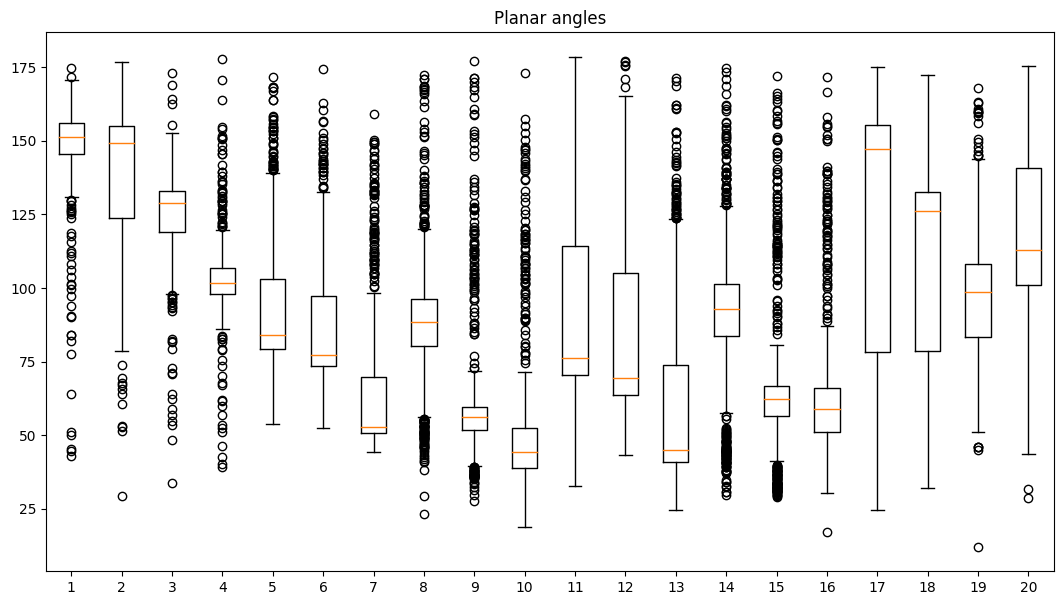

,"(0, 1, 2)","(0, 1, 3)","(0, 1, 4)","(0, 1, 5)","(0, 2, 3)","(0, 2, 4)","(0, 2, 5)","(0, 3, 4)","(0, 3, 5)","(0, 4, 5)","(1, 2, 3)","(1, 2, 4)","(1, 2, 5)","(1, 3, 4)","(1, 3, 5)","(1, 4, 5)","(2, 3, 4)","(2, 3, 5)","(2, 4, 5)","(3, 4, 5)"
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,147.853006,138.324657,124.661619,103.337230,94.554405,88.566110,67.423125,88.908084,63.841390,54.844193,93.527770,86.249331,63.991731,91.035248,67.837831,66.206594,123.911211,107.966128,97.274470,117.595521
std,17.015661,23.793879,15.800704,15.132856,23.263308,21.988146,26.586276,25.967078,27.920494,28.666610,30.280068,29.356533,32.822376,29.583654,29.619093,26.574150,44.892880,36.485552,22.087235,25.625505
min,42.796878,29.302553,33.746092,39.243459,53.919102,52.550781,44.182684,23.131140,27.655818,18.698874,32.884711,43.265837,24.674364,29.749957,28.896706,17.121503,24.542946,32.237572,12.129913,28.793338
25%,145.615387,123.667270,118.873117,97.967535,79.294205,73.618638,50.769325,80.197394,51.637876,38.956373,70.468067,63.697946,40.877213,83.612276,56.436277,51.057316,78.138099,78.687927,83.440453,101.040225
50%,151.266932,149.074339,128.784550,101.692930,83.867166,77.071876,52.720355,88.568885,56.121574,44.259115,76.246621,69.521790,44.910738,92.976398,62.251660,58.746038,147.269497,126.243220,98.725094,112.924511
75%,155.919384,155.130245,132.853519,106.764867,103.209273,97.241776,69.888374,96.351491,59.708244,52.498797,114.252340,105.038311,73.976101,101.348121,66.809460,65.913654,155.196166,132.441215,108.028831,140.868192
max,174.788704,176.577642,173.026452,177.679584,171.468944,174.336270,159.132036,172.338467,177.026667,172.937677,178.490591,177.127373,171.198363,174.546354,171.924916,171.683472,174.876290,172.200789,167.784913,175.314363


In [18]:
plt.figure(figsize=(13,7))
plt.title('Planar angles')
plt.boxplot(planar_angles_full)
plt.show()
planar_angles_full.describe()

In [19]:
#### OLD VERSION ###
torsion_angles = []
for row in data_full.iloc[:,:-1].iterrows():
    tmp = []
    for j in range(0,len(row[1])-3):
        tmp.append(count_torsion_angle(row[1][j], row[1][j+1], row[1][j+2], row[1][j+3]))
    torsion_angles.append(tmp)

torsion_angles_full = pd.DataFrame(torsion_angles)
print(torsion_angles_full)

             0          1          2
0   -91.595442 -87.891688  88.776989
1   -90.639541 -88.132034  88.304147
2   -90.993793 -87.365541  88.297745
3   -89.634132 -89.012277  89.218302
4   -92.241103 -88.259837  88.299287
..         ...        ...        ...
489  85.769296  81.919579  87.431274
490  87.251118 -77.796863  87.754915
491 -90.823432  87.605117 -87.536909
492  87.106584  86.625424  88.139975
493  94.069722 -92.078880 -90.691164

[494 rows x 3 columns]


In [8]:
from itertools import combinations
torsion_angles = []
cols=[]
for row in data_full.iloc[:,:-1].iterrows():
    tmp = []
    for i in range(len(row[1])-3):  
        for j in range(i+1, len(row[1])-2):  
            for k in range(j+1, len(row[1])-1):
                for l in range(k+1, len(row[1])):
                    tmp.append(count_torsion_angle(row[1][i], row[1][j], row[1][k], row[1][l]))
                    if len(cols) < 15:
                        cols.append((i,j,k,l))
    # for combo in combinations(row[1], 4):
    #     tmp.append(count_torsion_angle(combo[0], combo[1], combo[2], combo[3]))
    torsion_angles.append(tmp)

torsion_angles_full = pd.DataFrame(torsion_angles)
torsion_angles_full.columns=cols

### SKALOWANIE ZEBY NIE BYLO UJEMNYCH ###
for i in range(torsion_angles_full.shape[0]):
    torsion_angles_full.iloc[i] = torsion_angles_full.iloc[i].apply(lambda x: x+360 if x < 0 else x)
    
print(torsion_angles_full)

     (0, 1, 2, 3)  (0, 1, 2, 4)  (0, 1, 2, 5)  (0, 1, 3, 4)  (0, 1, 3, 5)  \
0      268.404558    267.369247    267.723436    270.515054    270.802809   
1      269.360459    268.901070    268.881355    270.331803    270.500069   
2      269.006207    268.395138    268.539201    270.368203    270.567663   
3      270.365868    269.986805    269.874088    270.217903    270.295194   
4      267.758897    265.137542    265.721048    270.825983    271.239297   
..            ...           ...           ...           ...           ...   
489     91.753714     92.684702     95.685321     90.856962     91.186875   
490     89.984624     89.897276     89.815369     90.021775     89.994784   
491     88.548180     88.666543     89.190040     88.422681     89.307171   
492     97.089144     91.255972     90.648952     90.134640     90.085601   
493     88.499054     89.591990     90.376080     90.174578     90.184926   

     (0, 1, 4, 5)  (0, 2, 3, 4)  (0, 2, 3, 5)  (0, 2, 4, 5)  (0, 3, 4, 5)  

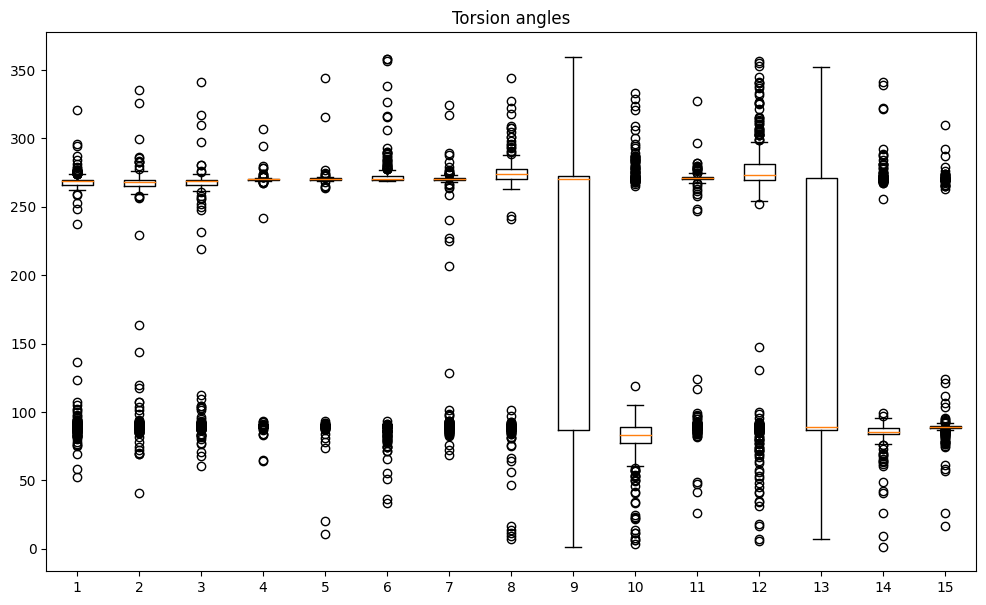

,"(0, 1, 2, 3)","(0, 1, 2, 4)","(0, 1, 2, 5)","(0, 1, 3, 4)","(0, 1, 3, 5)","(0, 1, 4, 5)","(0, 2, 3, 4)","(0, 2, 3, 5)","(0, 2, 4, 5)","(0, 3, 4, 5)","(1, 2, 3, 4)","(1, 2, 3, 5)","(1, 2, 4, 5)","(1, 3, 4, 5)","(2, 3, 4, 5)"
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,229.274761,232.086514,233.408249,242.896917,244.756050,234.843723,242.168824,244.954149,196.414441,113.941779,240.900008,237.051266,167.980565,108.223903,105.907437
std,75.820331,73.160266,72.022608,65.286906,64.505819,77.258396,66.564120,72.076907,98.616116,78.288889,68.676447,85.138484,96.221252,64.670072,54.260127
min,52.787876,40.407219,60.483283,64.259361,10.894363,33.103483,68.683043,7.006959,1.434120,3.267952,26.385759,5.851486,7.284839,1.600601,16.899881
25%,266.309592,265.485288,266.189405,269.853013,269.972796,270.000691,269.977946,270.247212,86.566003,77.524087,270.031323,269.870104,86.544937,83.593097,88.596137
50%,268.793381,268.372947,268.582459,270.264350,270.482259,270.714664,270.649194,273.892532,270.509686,83.244351,270.975609,273.009605,89.384508,85.376873,89.245759
75%,269.377961,269.738743,269.600857,270.534189,270.803774,272.921512,271.464629,277.506099,272.277944,89.146502,271.840637,281.164320,271.255302,88.622403,89.830125
max,320.663406,335.674344,341.399773,307.073315,344.118835,358.051571,324.611247,344.106855,359.754088,333.522552,327.615657,356.319779,352.282794,341.438020,309.554795


In [21]:
plt.figure(figsize=(12,7))
plt.title('Torsion angles')
plt.boxplot(torsion_angles_full)
plt.show()
planar_angles_full.describe()
torsion_angles_full.describe()

In [9]:
distances_full = []
for row in data_full.iloc[:,:-1].iterrows():
    tmp = []
    for j in range(0,len(row[1])):
        for k in range(j+1, len(row[1])):
            tmp.append(count_euclid_dist(row[1][j], row[1][k]))
    distances_full.append(tmp)

distances_full = pd.DataFrame(distances_full)
distances_full.columns = [(j,k) for j in range(0, data.shape[1]-1) for k in range(j+1, data.shape[1]-1)]
print(distances_full)

       (0, 1)     (0, 2)     (0, 3)     (0, 4)     (0, 5)    (1, 2)  \
0    5.733532  12.504305  12.791733  13.500355  10.564200  7.164484   
1    5.440949  12.410280  13.549124  14.526154  10.456760  7.204727   
2    5.547319  12.383069  13.741741  14.524595  10.646189  7.102341   
3    4.895635  12.171124  12.182229  13.757487  10.358555  7.704254   
4    5.422896  12.836306  14.254092  15.298563  10.548249  7.532824   
..        ...        ...        ...        ...        ...       ...   
489  5.742212  10.233653  13.817045  15.609903  17.439206  6.585784   
490  7.238646   6.000983   9.088080  13.503072  16.101009  8.855068   
491  5.120458  11.061468  15.553980  19.631576  23.212503  5.957296   
492  6.653354   5.613020  10.355482  15.294935  19.666355  6.410120   
493  5.418098  12.897700  14.485891   8.600029  10.918115  8.268905   

        (1, 3)     (1, 4)     (1, 5)    (2, 3)     (2, 4)     (2, 5)  \
0     7.325205   9.028184   7.949687  5.126119   9.941123  12.081338   
1  

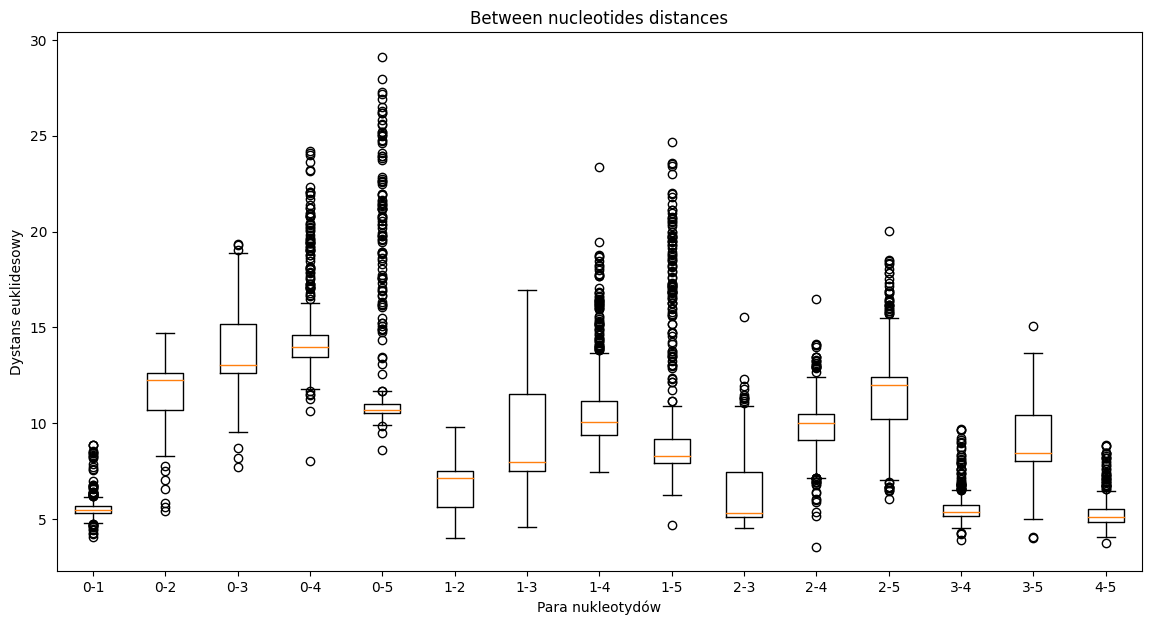

In [23]:
fig, axe = plt.subplots(figsize=(14, 7))
axe.boxplot(distances_full)
#axe.text(0.8, 0.5, f"correlation = {round(cor.correlation, 3)}", bbox=dict(facecolor='red', alpha=0.5), horizontalalignment = 'right', verticalalignment = 'top')
axe.set_title('Between nucleotides distances')
axe.set_xlabel('Para nukleotydów')
axe.set_ylabel('Dystans euklidesowy')
axe.set_xticklabels(list(f'{j}-{k}' for j in range(0, data.shape[1]-1) for k in range(j+1, data.shape[1]-1)))
plt.show()

<h3>Create one big dataframe</h3>

In [10]:
df = pd.concat([planar_angles_full, torsion_angles_full, distances_full], axis=1)
df

,"(0, 1, 2)","(0, 1, 3)","(0, 1, 4)","(0, 1, 5)","(0, 2, 3)","(0, 2, 4)","(0, 2, 5)","(0, 3, 4)","(0, 3, 5)","(0, 4, 5)",...,"(1, 2)","(1, 3)","(1, 4)","(1, 5)","(2, 3)","(2, 4)","(2, 5)","(3, 4)","(3, 5)","(4, 5)"
0,151.433853,156.610852,130.969524,99.809688,81.473986,72.943025,50.860094,86.571218,55.332476,43.123195,...,7.164484,7.325205,9.028184,7.949687,5.126119,9.941123,12.081338,5.148702,8.233006,4.711884
1,157.633789,148.449353,129.654734,102.217303,91.057233,80.670525,52.662660,90.209112,50.382545,31.711883,...,7.204727,8.609981,10.436844,7.852234,5.213086,9.824763,10.988605,5.188187,7.999570,5.213148
2,156.249586,152.574492,129.456448,103.048040,93.600313,79.270366,53.483722,86.341306,50.679322,30.788664,...,7.102341,8.578255,10.353439,7.920222,5.230696,10.238789,11.149645,5.662021,8.134808,4.857419
3,149.227210,127.373339,113.322206,91.947715,78.573351,75.254982,50.666060,91.848172,56.068061,42.331952,...,7.704254,8.572597,11.064033,8.963785,4.877964,10.220153,12.036276,6.011491,9.066458,5.537136
4,164.217632,154.964573,129.608687,103.226354,92.135806,80.616554,51.658154,90.375611,46.681860,24.078928,...,7.532824,9.154753,11.259722,7.891457,5.737500,10.675108,11.110191,5.463139,7.851490,5.464034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,112.040153,139.832693,155.452615,150.959529,116.760222,100.234302,89.210101,99.597705,90.199004,99.679997,...,6.585784,8.923364,10.203320,12.194714,5.756326,10.108501,14.262629,5.316361,10.592379,5.581731
490,42.313518,45.911573,48.016146,51.324417,107.262796,101.312559,89.166172,129.452041,113.226648,111.567071,...,8.855068,12.490321,17.226781,19.600192,5.272740,10.976312,15.028491,5.761552,10.181650,5.113448
491,173.767908,159.128837,143.339994,134.171245,143.235009,128.426778,120.800924,126.743097,120.644928,123.482125,...,5.957296,10.662157,15.284467,19.352150,5.213242,10.740658,15.514810,5.862648,11.038935,5.623181
492,50.851830,55.551906,58.422536,61.081632,122.730251,123.638862,121.886784,147.908424,138.092482,136.567685,...,6.410120,12.546076,17.689893,22.001605,6.181442,11.454190,16.115083,5.498046,10.703097,5.512148


In [11]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

<h2>Data distribution check</h2>

In [12]:
from scipy.stats import shapiro
stat, p_value = shapiro(df)
print(f'Shapiro-Wilk Test: Statistic={stat}, p-value={p_value}')

## rozkład nienormalny

Shapiro-Wilk Test: Statistic=0.8356198072433472, p-value=0.0


c:\Users\marce\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [13]:
df_norm = preprocessing.normalize(df) 

<h1> Models testing </h1>

In [14]:
data_full = data_full.reset_index(drop=True)   #base dataframe with nucleotides coords and class
y = data_full['class']
data_full

,N1,N2,N3,N4,N5,N6,class
0,"[72.379, 32.575, 10.796]","[77.895, 33.755, 9.769]","[84.753, 31.765, 9.188]","[84.547, 36.507, 11.124]","[82.675, 41.303, 11.068]","[78.004, 41.475, 11.663]",1
1,"[14.263, 65.819, 16.505]","[12.633, 71.007, 16.327]","[8.943, 76.9, 18.215]","[7.04, 76.843, 13.362]","[8.532, 76.432, 8.41]","[11.439, 72.111, 8.645]",1
2,"[54.509, 39.342, 49.313]","[60.011, 39.781, 49.868]","[66.82, 38.868, 48.066]","[67.582, 37.195, 52.963]","[65.914, 38.341, 58.251]","[61.112, 38.748, 57.643]",1
3,"[2.716, 78.732, 56.751]","[1.84, 82.233, 60.059]","[-1.302, 89.045, 61.814]","[2.221, 90.716, 58.883]","[8.213, 91.183, 58.757]","[9.909, 85.912, 58.753]",1
4,"[13.564, 1.567, 34.626]","[17.065, 3.703, 38.174]","[20.272, 6.608, 44.34]","[24.028, 9.055, 40.759]","[27.216, 8.24, 36.398]","[23.132, 5.894, 33.628]",1
...,...,...,...,...,...,...,...
489,"[8.915, 33.856, 4.093]","[10.499, 32.464, -1.248]","[14.384, 37.046, -3.947]","[17.58, 33.089, -6.642]","[16.448, 28.182, -8.346]","[12.898, 24.138, -9.829]",0
490,"[-13.141, 10.744, 14.692]","[-14.621, 17.665, 13.173]","[-18.599, 9.793, 12.386]","[-21.586, 7.756, 16.224]","[-23.817, 5.356, 20.963]","[-23.432, 5.795, 26.043]",0
491,"[-4.632, -10.059, -5.756]","[-5.617, -6.33, -2.388]","[-6.318, -2.267, 1.912]","[-3.871, 0.984, 5.171]","[0.971, 3.63, 7.152]","[5.139, 7.28, 6.19]",0
492,"[181.202, 366.259, 167.652]","[183.865, 360.964, 164.629]","[178.52, 361.353, 168.146]","[173.167, 360.761, 171.18]","[167.723, 360.368, 171.841]","[162.532, 360.54, 169.995]",0


In [477]:
data_full.iloc[180]

N1       [120.405, -77.292, 69.804]
N2       [116.124, -74.595, 73.657]
N3       [111.802, -70.841, 78.902]
N4        [115.766, -67.601, 78.08]
N5         [120.1, -63.496, 76.278]
N6        [119.346, -66.81, 71.649]
class                             1
Name: 180, dtype: object

<h3>1. Gaussian Naive bayes - (assumes that data is normally distributed)</h3>
<h5>Which is not here but ok</h5>

In [15]:
from sklearn.naive_bayes import GaussianNB

#df_norm = preprocessing.normalize(df)   

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=12)

gnb = GaussianNB()
model_GNB = gnb.fit(X_train, y_train)

y_pred_GNB = model_GNB.predict(X_test)

confusion_GNB = confusion_matrix(y_test, y_pred_GNB)
print(confusion_GNB)
print(("Accuracy is"), accuracy_score(y_test, y_pred_GNB) * 100)


[[51  4]
 [ 3 41]]
Accuracy is 92.92929292929293


In [16]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
print(("Accuracy is"), accuracy_score(y_test, y_pred_GNB) * 100)
print(("Presisions is"), precision_score(y_test, y_pred_GNB) * 100)
print(("Recall is"), recall_score(y_test, y_pred_GNB) * 100)
print(("F1 is"), f1_score(y_test, y_pred_GNB) * 100)

Accuracy is 92.92929292929293
Presisions is 91.11111111111111
Recall is 93.18181818181817
F1 is 92.13483146067416


In [17]:
df_d = df.copy()
df_d['class'] = y

In [ ]:
import seaborn as sns

# Wykresy gęstości cech dla każdej klasy
# for feature in list(df.columns):  # Pomijamy kolumnę 'label'
#     plt.figure(figsize=(10, 6))
#     sns.kdeplot(data=df_d, x=feature, hue='class', fill=True)
#     plt.title(f'Feature Density Plot for {feature}')
#     plt.show()

means = model_GNB.theta_
stds = np.sqrt(model_GNB.sigma_)

# DataFrame ze średnimi cech dla każdej klasy
df_means = pd.DataFrame(means.T, columns=[f'Class {i}' for i in range(means.shape[0])], index=df.columns)
print("Means of features for each class:")
#print(df_means)

# DataFrame z odchyleniami standardowymi cech dla każdej klasy
df_stds = pd.DataFrame(stds.T, columns=[f'Class {i}' for i in range(stds.shape[0])], index=df.columns)
print("Standard deviations of features for each class:")
#print(df_stds)


In [376]:
# Find indices of misclassified instances

misclassified_indices = (y_test != y_pred_GNB)
misclassified_indices = misclassified_indices[misclassified_indices].index
misclassified_true_labels = y_test[misclassified_indices]

print("Indices wrongly assigned and their correct classes")
misclassified_true_labels

Indices wrongly assigned and their correct classes


344    0
317    0
334    0
304    0
180    1
201    1
86     1
Name: class, dtype: int64

<h3>2. Multinomial Naive Bayes </h3>

In [509]:
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=12)

clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred_MNB = clf.predict(X_test)

confusion_MNB = confusion_matrix(y_test, y_pred_MNB)
print(confusion_MNB)
print(("Accuracy is"), accuracy_score(y_test, y_pred_MNB) * 100)

[[50  5]
 [ 4 40]]
Accuracy is 90.9090909090909


In [112]:
print(("Accuracy is"), accuracy_score(y_test, y_pred_MNB) * 100)
print(("Presisions is"), precision_score(y_test, y_pred_MNB) * 100)
print(("Recall is"), recall_score(y_test, y_pred_MNB) * 100)
print(("F1 is"), f1_score(y_test, y_pred_MNB) * 100)

Accuracy is 90.9090909090909
Presisions is 88.88888888888889
Recall is 90.9090909090909
F1 is 89.8876404494382


In [76]:
misclassified_indices = (y_test != y_pred_MNB)
misclassified_indices = misclassified_indices[misclassified_indices].index
misclassified_true_labels = y_test[misclassified_indices]

print("Indices wrongly assigned and their correct classes")
misclassified_true_labels

Indices wrongly assigned and their correct classes


344    0
317    0
334    0
304    0
180    1
201    1
86     1
387    0
Name: class, dtype: int64

<h3>3. Logistic regression </h3>

In [18]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=12)

clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

y_pred_LR = clf.predict(X_test)

confusion_LR = confusion_matrix(y_test, y_pred_LR)
print(confusion_LR)
print(("Accuracy is"), accuracy_score(y_test, y_pred_LR) * 100)

[[48  7]
 [ 3 41]]
Accuracy is 89.8989898989899


In [19]:
print(("Accuracy is"), accuracy_score(y_test, y_pred_LR) * 100)
print(("Presisions is"), precision_score(y_test, y_pred_LR) * 100)
print(("Recall is"), recall_score(y_test, y_pred_LR) * 100)
print(("F1 is"), f1_score(y_test, y_pred_LR) * 100)

Accuracy is 89.8989898989899
Presisions is 85.41666666666666
Recall is 93.18181818181817
F1 is 89.13043478260869


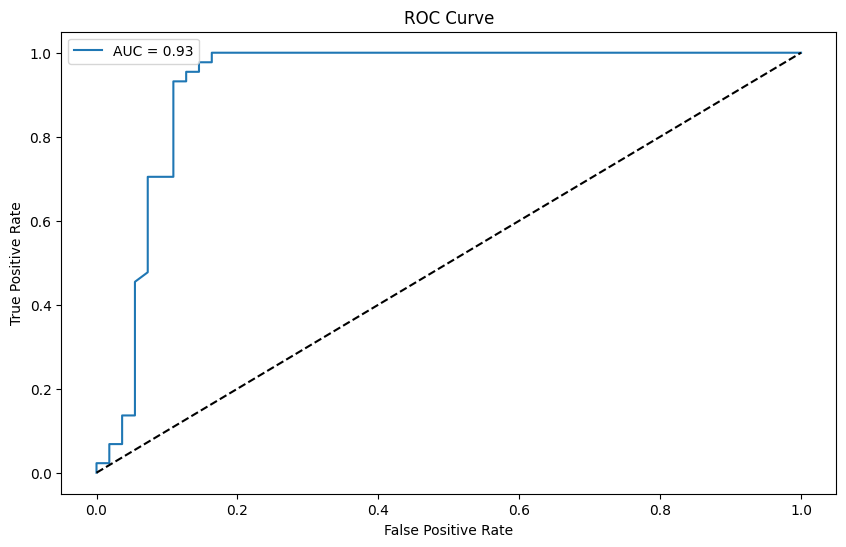

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predykcje prawdopodobieństw na zbiorze testowym
y_probs = clf.predict_proba(X_test)[:, 1]

# Obliczenie krzywej ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

# Wykres krzywej ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


[(0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 5), (0, 2, 3), (0, 2, 4), (0, 2, 5), (0, 3, 4), (0, 3, 5), (0, 4, 5), (1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 3, 4), (1, 3, 5), (1, 4, 5), (2, 3, 4), (2, 3, 5), (2, 4, 5), (3, 4, 5), (0, 1, 2, 3), (0, 1, 2, 4), (0, 1, 2, 5), (0, 1, 3, 4), (0, 1, 3, 5), (0, 1, 4, 5), (0, 2, 3, 4), (0, 2, 3, 5), (0, 2, 4, 5), (0, 3, 4, 5), (1, 2, 3, 4), (1, 2, 3, 5), (1, 2, 4, 5), (1, 3, 4, 5), (2, 3, 4, 5), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]


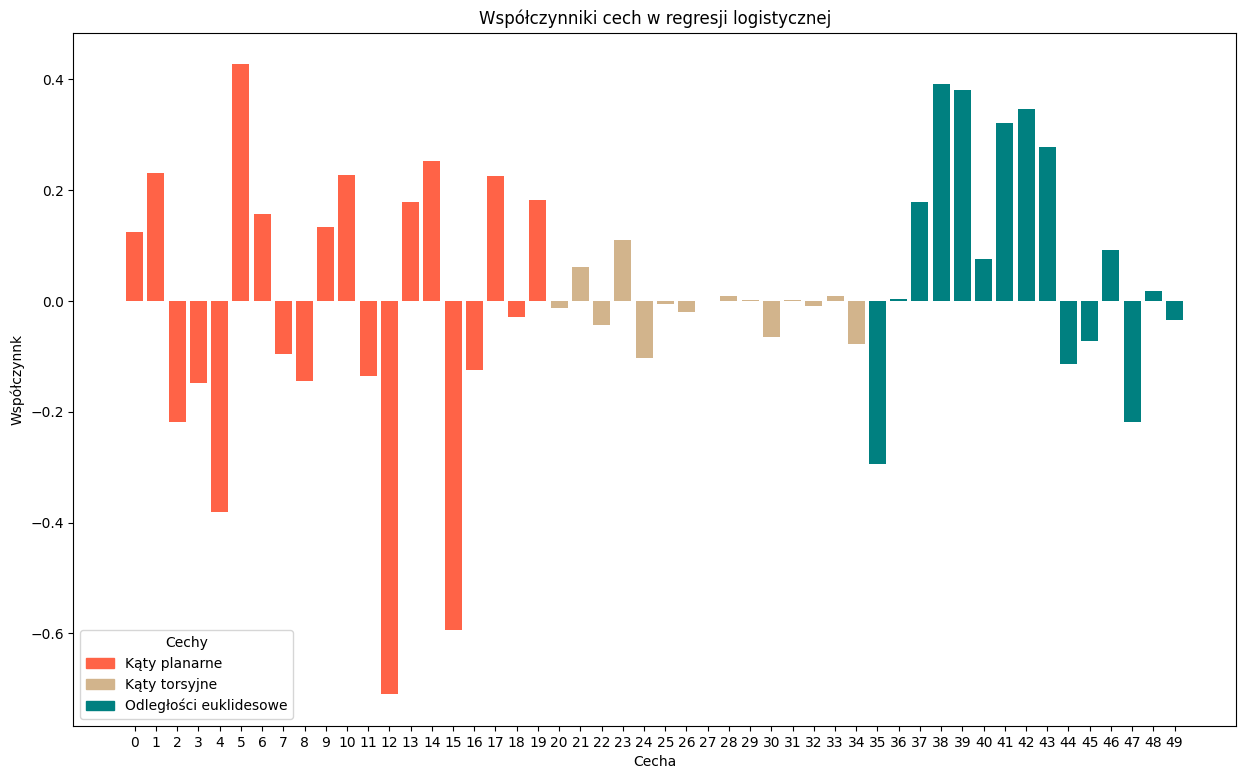

In [32]:
import matplotlib.patches as mpatches
# Pobranie współczynników
coefficients = list(clf.coef_[0])
features = list(df.columns)
print(features)

colors = []
for feature in features:
    length = len(feature)
    if length == 3:
        colors.append('tomato')  # Features with length 3
    elif length == 4:
        colors.append('tan')  # Features with length 4
    elif length == 2:
        colors.append('teal')  # Features with length 2
    else:
        colors.append('gray')  # Default color for other lengths

features = [str(x) for x in range(len(features))]
#Wykres współczynników
plt.figure(figsize=(15, 9))
plt.bar(features, coefficients, color=colors)
plt.xlabel('Cecha')
plt.ylabel('Współczynnk')
plt.title('Współczynniki cech w regresji logistycznej')

red_patch = mpatches.Patch(color='tomato', label='Kąty planarne')
blue_patch = mpatches.Patch(color='tan', label='Kąty torsyjne')
green_patch = mpatches.Patch(color='teal', label='Odległości euklidesowe')

plt.legend(handles=[red_patch, blue_patch, green_patch], title="Cechy")

plt.show()


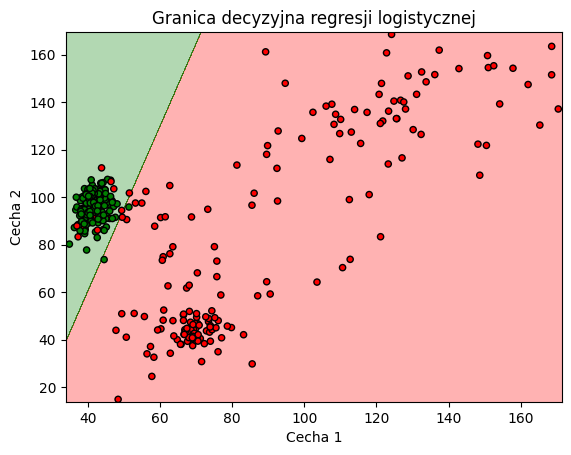

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# Zakładam, że df_features to dataframe z danymi wejściowymi, a y to seria z etykietami
# Jeśli df_features zawiera więcej niż dwie cechy, wybierz dwie cechy do wizualizacji
df_features = df.iloc[:, 12:14]  # Zakładam, że wybieramy pierwsze dwie cechy

# Konwersja kolumn df_features do typów numerycznych (jeśli to konieczne)
df_features = df_features.apply(pd.to_numeric, errors='coerce')

# Usunięcie wierszy z brakującymi wartościami (opcjonalnie)
df_features = df_features.dropna()

# Podział danych na zbiory treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(df_features, y, test_size=0.2, random_state=12)

# Tworzenie i trenowanie modelu regresji logistycznej
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

# Przygotowanie siatki punktów do rysowania granicy decyzyjnej
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predykcje modelu dla siatki punktów
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Rysowanie wykresu
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green')))
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolor='k', s=20, cmap=ListedColormap(('red', 'green')))
plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')
plt.title('Granica decyzyjna regresji logistycznej')
plt.show()


In [379]:
misclassified_indices = (y_test != y_pred_LR)
misclassified_indices = misclassified_indices[misclassified_indices].index
misclassified_true_labels = y_test[misclassified_indices]

print("Indices wrongly assigned and their correct classes")
misclassified_true_labels

Indices wrongly assigned and their correct classes


344    0
317    0
334    0
44     1
308    0
408    0
101    1
304    0
412    0
202    1
Name: class, dtype: int64

<h3>4. Drzewo decyzyjne</h3>

In [491]:
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=12)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

#tree.plot_tree(clf)

y_pred_TC = clf.predict(X_test)

confusion_TC = confusion_matrix(y_test, y_pred_TC)
print(confusion_TC)
print(("Accuracy is"), accuracy_score(y_test, y_pred_TC) * 100)


[[49  1]
 [ 9 40]]
Accuracy is 89.8989898989899


In [381]:
len(y_train[y_train== 0])

190

In [399]:
print(("Accuracy is"), accuracy_score(y_test, y_pred_TC) * 100)
print(("Presisions is"), precision_score(y_test, y_pred_TC) * 100)
print(("Recall is"), recall_score(y_test, y_pred_TC) * 100)
print(("F1 is"), f1_score(y_test, y_pred_TC) * 100)

Accuracy is 88.88888888888889
Presisions is 92.3076923076923
Recall is 81.81818181818183
F1 is 86.74698795180724


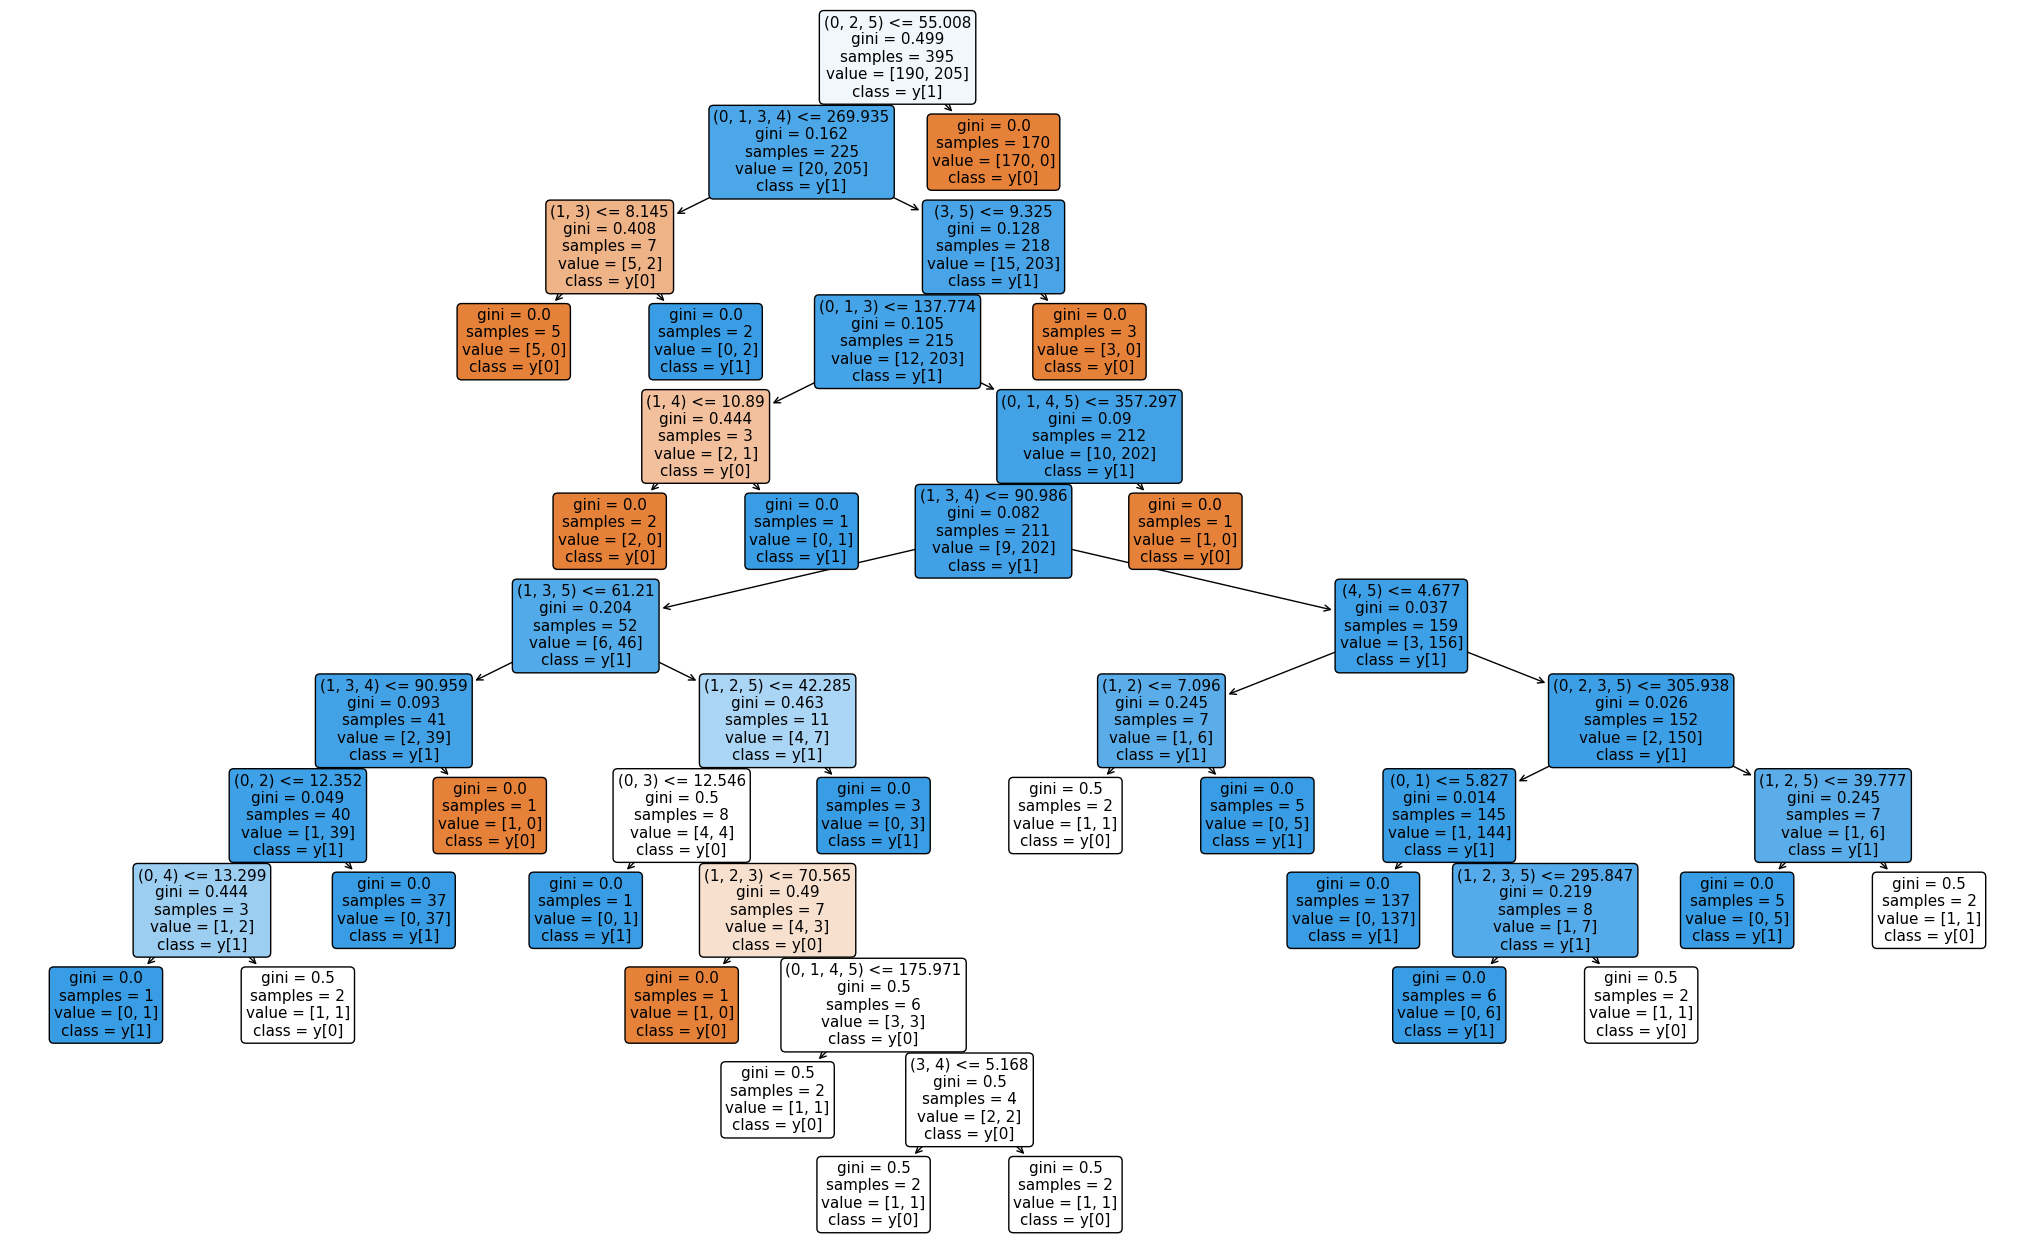

In [109]:
plt.figure(figsize=(26,16))
tree.plot_tree(clf, filled=True, feature_names=df.columns, class_names=True, rounded=True)
plt.show()

In [400]:
misclassified_indices = (y_test != y_pred_TC)
misclassified_indices = misclassified_indices[misclassified_indices].index
misclassified_true_labels = y_test[misclassified_indices]

print("Indices wrongly assigned and their correct classes")
misclassified_true_labels

Indices wrongly assigned and their correct classes


188    1
207    1
317    0
44     1
408    0
304    0
21     1
37     1
180    1
29     1
86     1
Name: class, dtype: int64

<h3>5. Random forest</h3>

In [493]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=12)

rf = RandomForestClassifier(n_estimators=30)
rf.fit(X_train, y_train)

y_pred_RF = rf.predict(X_test)

confusion_RF = confusion_matrix(y_test, y_pred_RF)
print(confusion_RF)
print(("Accuracy is"), accuracy_score(y_test, y_pred_RF) * 100)

[[51  4]
 [ 3 41]]
Accuracy is 92.92929292929293


In [402]:
print(("Accuracy is"), accuracy_score(y_test, y_pred_RF) * 100)
print(("Presisions is"), precision_score(y_test, y_pred_RF) * 100)
print(("Recall is"), recall_score(y_test, y_pred_RF) * 100)
print(("F1 is"), f1_score(y_test, y_pred_RF) * 100)

Accuracy is 92.92929292929293
Presisions is 91.11111111111111
Recall is 93.18181818181817
F1 is 92.13483146067416


In [403]:
misclassified_indices = (y_test != y_pred_RF)
misclassified_indices = misclassified_indices[misclassified_indices].index
misclassified_true_labels = y_test[misclassified_indices]

print("Indices wrongly assigned and their correct classes")
misclassified_true_labels

Indices wrongly assigned and their correct classes


344    0
317    0
334    0
44     1
304    0
180    1
29     1
Name: class, dtype: int64

<h3>Standaryzacja</h3>

In [33]:
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df))
df_std.columns=df.columns
df_std

,"(0, 1, 2)","(0, 1, 3)","(0, 1, 4)","(0, 1, 5)","(0, 2, 3)","(0, 2, 4)","(0, 2, 5)","(0, 3, 4)","(0, 3, 5)","(0, 4, 5)",...,"(1, 2)","(1, 3)","(1, 4)","(1, 5)","(2, 3)","(2, 4)","(2, 5)","(3, 4)","(3, 5)","(4, 5)"
0,0.232874,0.766933,0.357684,-0.213884,-0.566335,-0.695318,-0.610228,-0.082708,-0.293690,-0.401700,...,0.377520,-0.858197,-0.782259,-0.513353,-0.646917,0.096313,0.193316,-0.570056,-0.596848,-0.795390
1,0.576279,0.430582,0.281670,-0.073934,-0.136958,-0.339048,-0.541545,0.057046,-0.471396,-0.795791,...,0.415083,-0.366041,-0.205914,-0.537304,-0.607869,0.017449,-0.256342,-0.521302,-0.747912,-0.176180
2,0.499610,0.600586,0.270206,-0.025646,-0.023016,-0.403601,-0.510260,-0.091540,-0.460741,-0.827675,...,0.319516,-0.378194,-0.240038,-0.520594,-0.599962,0.298056,-0.190074,0.063760,-0.660395,-0.615611
3,0.110652,-0.438002,-0.662586,-0.670883,-0.696298,-0.588727,-0.617621,0.120013,-0.267282,-0.429025,...,0.881343,-0.380362,0.050697,-0.264115,-0.758341,0.285425,0.174773,0.495266,-0.057498,0.224040
4,0.940947,0.699086,0.279008,-0.015281,-0.088633,-0.341536,-0.579819,0.063443,-0.604252,-1.059396,...,0.721329,-0.157357,0.130762,-0.527664,-0.372404,0.593771,-0.206309,-0.181808,-0.843738,0.133738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,-1.949079,0.075472,1.773160,2.759346,1.014663,0.562924,0.851025,0.417720,0.958039,1.551498,...,-0.162640,-0.245994,-0.301459,0.529961,-0.363951,0.209753,1.090912,-0.363042,0.929969,0.279129
490,-5.811124,-3.795198,-4.438218,-3.032228,0.589131,0.612636,0.849351,1.564610,1.784745,1.962019,...,1.955516,1.120390,2.572151,2.350027,-0.581084,0.797913,1.406063,0.186655,0.664175,-0.299340
491,1.469921,0.870704,1.072875,1.783479,2.200864,1.862715,2.054732,1.460542,2.051066,2.373507,...,-0.749273,0.420080,1.777464,2.289066,-0.607799,0.638198,1.606182,0.311482,1.218948,0.330332
492,-5.338201,-3.397901,-3.836579,-2.465062,1.282150,1.641972,2.096106,2.273633,2.677443,2.825419,...,-0.326605,1.141748,2.761630,2.940230,-0.173071,1.121795,1.853194,-0.138707,1.001618,0.193174


<h3>6. SVM</h3>

In [495]:
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(df_std, y, test_size=0.2, random_state=12)   #lepszy wynik po standaryzacji

clf = svm.SVC()
clf.fit(X_train, y_train)

y_pred_SVM = clf.predict(X_test)

confusion_SVM = confusion_matrix(y_test, y_pred_SVM)
print(confusion_SVM)
print(("Accuracy is"), accuracy_score(y_test, y_pred_SVM) * 100)

[[51  4]
 [ 1 43]]
Accuracy is 94.94949494949495


In [406]:
from sklearn.decomposition import PCA

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the SVM classifier on the PCA-transformed data
clf = svm.SVC()  
clf.fit(X_train_pca, y_train)

# Predict on the PCA-transformed test set
y_pred_SVM = clf.predict(X_test_pca)

# Confusion matrix and accuracy
confusion_SVM = confusion_matrix(y_test, y_pred_SVM)
print(confusion_SVM)
print("Accuracy is", accuracy_score(y_test, y_pred_SVM) * 100)

[[49  6]
 [ 2 42]]
Accuracy is 91.91919191919192


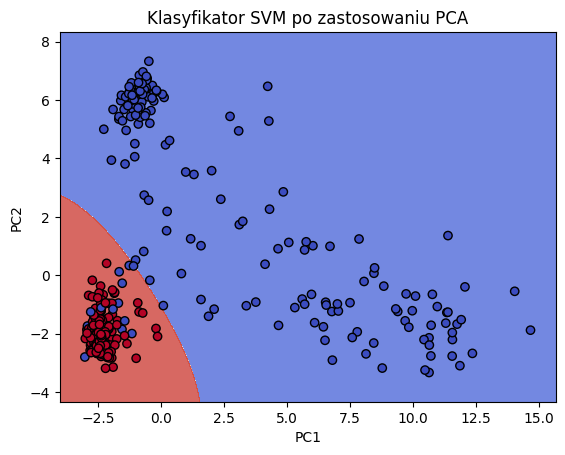

In [189]:
def plot_decision_boundary(X, y, model):
    # Create a mesh to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Klasyfikator SVM po zastosowaniu PCA')
    plt.show()

plot_decision_boundary(X_train_pca, y_train, clf)

In [410]:
print(("Accuracy is"), accuracy_score(y_test, y_pred_SVM) * 100)
print(("Presisions is"), precision_score(y_test, y_pred_SVM) * 100)
print(("Recall is"), recall_score(y_test, y_pred_SVM) * 100)
print(("F1 is"), f1_score(y_test, y_pred_SVM) * 100)

Accuracy is 94.94949494949495
Presisions is 91.48936170212765
Recall is 97.72727272727273
F1 is 94.5054945054945


In [411]:
misclassified_indices = (y_test != y_pred_SVM)
misclassified_indices = misclassified_indices[misclassified_indices].index
misclassified_true_labels = y_test[misclassified_indices]

print("Indices wrongly assigned and their correct classes")
misclassified_true_labels

Indices wrongly assigned and their correct classes


344    0
317    0
334    0
304    0
180    1
Name: class, dtype: int64

<h1>Neural networks</h1>

In [46]:
df

,"(0, 1, 2)","(0, 1, 3)","(0, 1, 4)","(0, 1, 5)","(0, 2, 3)","(0, 2, 4)","(0, 2, 5)","(0, 3, 4)","(0, 3, 5)","(0, 4, 5)",...,"(1, 2)","(1, 3)","(1, 4)","(1, 5)","(2, 3)","(2, 4)","(2, 5)","(3, 4)","(3, 5)","(4, 5)"
0,151.433853,156.610852,130.969524,99.809688,81.473986,72.943025,50.860094,86.571218,55.332476,43.123195,...,7.164484,7.325205,9.028184,7.949687,5.126119,9.941123,12.081338,5.148702,8.233006,4.711884
1,157.633789,148.449353,129.654734,102.217303,91.057233,80.670525,52.662660,90.209112,50.382545,31.711883,...,7.204727,8.609981,10.436844,7.852234,5.213086,9.824763,10.988605,5.188187,7.999570,5.213148
2,156.249586,152.574492,129.456448,103.048040,93.600313,79.270366,53.483722,86.341306,50.679322,30.788664,...,7.102341,8.578255,10.353439,7.920222,5.230696,10.238789,11.149645,5.662021,8.134808,4.857419
3,149.227210,127.373339,113.322206,91.947715,78.573351,75.254982,50.666060,91.848172,56.068061,42.331952,...,7.704254,8.572597,11.064033,8.963785,4.877964,10.220153,12.036276,6.011491,9.066458,5.537136
4,164.217632,154.964573,129.608687,103.226354,92.135806,80.616554,51.658154,90.375611,46.681860,24.078928,...,7.532824,9.154753,11.259722,7.891457,5.737500,10.675108,11.110191,5.463139,7.851490,5.464034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,112.040153,139.832693,155.452615,150.959529,116.760222,100.234302,89.210101,99.597705,90.199004,99.679997,...,6.585784,8.923364,10.203320,12.194714,5.756326,10.108501,14.262629,5.316361,10.592379,5.581731
490,42.313518,45.911573,48.016146,51.324417,107.262796,101.312559,89.166172,129.452041,113.226648,111.567071,...,8.855068,12.490321,17.226781,19.600192,5.272740,10.976312,15.028491,5.761552,10.181650,5.113448
491,173.767908,159.128837,143.339994,134.171245,143.235009,128.426778,120.800924,126.743097,120.644928,123.482125,...,5.957296,10.662157,15.284467,19.352150,5.213242,10.740658,15.514810,5.862648,11.038935,5.623181
492,50.851830,55.551906,58.422536,61.081632,122.730251,123.638862,121.886784,147.908424,138.092482,136.567685,...,6.410120,12.546076,17.689893,22.001605,6.181442,11.454190,16.115083,5.498046,10.703097,5.512148


<h3>Feedforward Neural Network - basic one

In [459]:
import tensorflow as tf
from tensorflow import keras

X_train, X_test, y_train, y_test = train_test_split(df_std, y, test_size=0.2, random_state=12)

model = keras.Sequential(
    [
        keras.layers.Dense(50, activation="relu", name="input_layer"),  
        keras.layers.Dropout(rate=0.5), 
        keras.layers.Dense(32, activation="relu", name="hidden_layer_1"), 
        keras.layers.Dense(16, activation="relu", name="hidden_layer_2"), 
        # keras.layers.Dense(8, activation="relu", name="hidden_layer_3"), 
        keras.layers.Dense(1,  activation='sigmoid', name="output_layer"),
    ]
)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

checkpoint = keras.callbacks.ModelCheckpoint('best_model_FN', save_best_only=True, monitor='loss', mode='min', verbose=0)

model.fit(X_train, y_train, epochs=10, callbacks=checkpoint)  

Epoch 1/10
13/13 [==============================] - 1s 61ms/step - loss: 0.5954 - accuracy: 0.6025
Epoch 2/10
13/13 [==============================] - 1s 67ms/step - loss: 0.3852 - accuracy: 0.8861
Epoch 3/10
13/13 [==============================] - 1s 59ms/step - loss: 0.2660 - accuracy: 0.9291
Epoch 4/10
13/13 [==============================] - 1s 57ms/step - loss: 0.2147 - accuracy: 0.9367
Epoch 5/10
13/13 [==============================] - 1s 58ms/step - loss: 0.1836 - accuracy: 0.9468
Epoch 6/10
13/13 [==============================] - 1s 56ms/step - loss: 0.1790 - accuracy: 0.9443
Epoch 7/10
13/13 [==============================] - 1s 60ms/step - loss: 0.1714 - accuracy: 0.9544
Epoch 8/10
13/13 [==============================] - 2s 140ms/step - loss: 0.1656 - accuracy: 0.9519
Epoch 9/10
13/13 [==============================] - 1s 57ms/step - loss: 0.1600 - accuracy: 0.9494
Epoch 10/10
13/13 [==============================] - 0s 2ms/step - loss: 0.1626 - accuracy: 0.9494


In [460]:
y_pred_NN = model.predict(X_test)
y_pred_NN = np.where(y_pred_NN > 0.5, 1, 0)
#print(y_pred_NN)
#print(y_test)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Accuracy: {test_acc} loss: {test_loss}')

confusion_NN = confusion_matrix(y_test, y_pred_NN)
print(confusion_NN)
print(("Accuracy is"), accuracy_score(y_test, y_pred_NN) * 100)

4/4 [==============================] - 0s 0s/step - loss: 0.1941 - accuracy: 0.9495
Accuracy: 0.9494949579238892 loss: 0.19412516057491302
[[50  5]
 [ 0 44]]
Accuracy is 94.94949494949495


In [461]:
print(("Accuracy is"), accuracy_score(y_test, y_pred_NN) * 100)
print(("Presisions is"), precision_score(y_test, y_pred_NN) * 100)
print(("Recall is"), recall_score(y_test, y_pred_NN) * 100)
print(("F1 is"), f1_score(y_test, y_pred_NN) * 100)

Accuracy is 94.94949494949495
Presisions is 89.79591836734694
Recall is 100.0
F1 is 94.62365591397848


In [473]:
misclassified_indices = (y_test != y_pred_NN.flatten())
misclassified_indices = misclassified_indices[misclassified_indices].index
misclassified_true_labels = y_test[misclassified_indices]

print("Indices wrongly assigned and their correct classes")
misclassified_true_labels

Indices wrongly assigned and their correct classes


344    0
317    0
334    0
408    0
304    0
Name: class, dtype: int64

In [134]:
import tensorflow as tf
from tensorflow import keras

X_train, X_test, y_train, y_test = train_test_split(df_std, y, test_size=0.2, random_state=12)

model = keras.Sequential(
    [
        keras.layers.Dense(32, activation="relu", name="input_layer"),
        keras.layers.Dropout(rate=0.5), 
        keras.layers.Dense(16, activation="relu", name="hidden_layer_1"),  
        keras.layers.Dense(2,  activation='softmax', name="output_layer"),
    ]
)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint = keras.callbacks.ModelCheckpoint('best_model', save_best_only=True, monitor='loss', mode='min', verbose=0)
  
model.fit(X_train, y_train, epochs=10, callbacks=checkpoint)   

Epoch 1/10
13/13 [==============================] - 2s 86ms/step - loss: 0.9586 - accuracy: 0.5747
Epoch 2/10
13/13 [==============================] - 1s 81ms/step - loss: 0.5684 - accuracy: 0.7797
Epoch 3/10
13/13 [==============================] - 1s 81ms/step - loss: 0.4117 - accuracy: 0.8557
Epoch 4/10
13/13 [==============================] - 1s 79ms/step - loss: 0.3036 - accuracy: 0.9063
Epoch 5/10
13/13 [==============================] - 1s 75ms/step - loss: 0.2774 - accuracy: 0.9215
Epoch 6/10
13/13 [==============================] - 0s 3ms/step - loss: 0.2827 - accuracy: 0.9215
Epoch 7/10
13/13 [==============================] - 1s 80ms/step - loss: 0.2313 - accuracy: 0.9392
Epoch 8/10
13/13 [==============================] - 1s 75ms/step - loss: 0.2250 - accuracy: 0.9443
Epoch 9/10
13/13 [==============================] - 0s 3ms/step - loss: 0.2324 - accuracy: 0.9392
Epoch 10/10
13/13 [==============================] - 0s 3ms/step - loss: 0.2417 - accuracy: 0.9392


In [135]:
y_pred_NN = model.predict(X_test)
y_pred_NN = np.where(y_pred_NN > 0.5, 1, 0)
#print(y_pred_NN)
#print(y_test)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

confusion_NN = confusion_matrix(y_test, [x[1] for x in y_pred_NN])
print(confusion_NN)
print(("Accuracy is"), accuracy_score(y_test, [x[1] for x in y_pred_NN]) * 100)

4/4 [==============================] - 0s 0s/step - loss: 0.1773 - accuracy: 0.9293
0.9292929172515869
[[50  5]
 [ 2 42]]
Accuracy is 92.92929292929293


Ze wszystkich modeli powyżej wyciągnąć te motywy, które nie są wykrywalne. Może się pokrywają dla różnych modeli  - zbadać korelacje, wplyw motywu na wykrywalnosc itd

<h2> Graph neural network </h2>

Full dataset

In [35]:
df_std
#df

,"(0, 1, 2)","(0, 1, 3)","(0, 1, 4)","(0, 1, 5)","(0, 2, 3)","(0, 2, 4)","(0, 2, 5)","(0, 3, 4)","(0, 3, 5)","(0, 4, 5)",...,"(1, 2)","(1, 3)","(1, 4)","(1, 5)","(2, 3)","(2, 4)","(2, 5)","(3, 4)","(3, 5)","(4, 5)"
0,0.232874,0.766933,0.357684,-0.213884,-0.566335,-0.695318,-0.610228,-0.082708,-0.293690,-0.401700,...,0.377520,-0.858197,-0.782259,-0.513353,-0.646917,0.096313,0.193316,-0.570056,-0.596848,-0.795390
1,0.576279,0.430582,0.281670,-0.073934,-0.136958,-0.339048,-0.541545,0.057046,-0.471396,-0.795791,...,0.415083,-0.366041,-0.205914,-0.537304,-0.607869,0.017449,-0.256342,-0.521302,-0.747912,-0.176180
2,0.499610,0.600586,0.270206,-0.025646,-0.023016,-0.403601,-0.510260,-0.091540,-0.460741,-0.827675,...,0.319516,-0.378194,-0.240038,-0.520594,-0.599962,0.298056,-0.190074,0.063760,-0.660395,-0.615611
3,0.110652,-0.438002,-0.662586,-0.670883,-0.696298,-0.588727,-0.617621,0.120013,-0.267282,-0.429025,...,0.881343,-0.380362,0.050697,-0.264115,-0.758341,0.285425,0.174773,0.495266,-0.057498,0.224040
4,0.940947,0.699086,0.279008,-0.015281,-0.088633,-0.341536,-0.579819,0.063443,-0.604252,-1.059396,...,0.721329,-0.157357,0.130762,-0.527664,-0.372404,0.593771,-0.206309,-0.181808,-0.843738,0.133738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,-1.949079,0.075472,1.773160,2.759346,1.014663,0.562924,0.851025,0.417720,0.958039,1.551498,...,-0.162640,-0.245994,-0.301459,0.529961,-0.363951,0.209753,1.090912,-0.363042,0.929969,0.279129
490,-5.811124,-3.795198,-4.438218,-3.032228,0.589131,0.612636,0.849351,1.564610,1.784745,1.962019,...,1.955516,1.120390,2.572151,2.350027,-0.581084,0.797913,1.406063,0.186655,0.664175,-0.299340
491,1.469921,0.870704,1.072875,1.783479,2.200864,1.862715,2.054732,1.460542,2.051066,2.373507,...,-0.749273,0.420080,1.777464,2.289066,-0.607799,0.638198,1.606182,0.311482,1.218948,0.330332
492,-5.338201,-3.397901,-3.836579,-2.465062,1.282150,1.641972,2.096106,2.273633,2.677443,2.825419,...,-0.326605,1.141748,2.761630,2.940230,-0.173071,1.121795,1.853194,-0.138707,1.001618,0.193174


Full dataset with nucleotides - one for each node of graph

In [36]:
df_std_nucs = df_std.copy()
df_std_nucs['seq'] = seqs
df_std_nucs

,"(0, 1, 2)","(0, 1, 3)","(0, 1, 4)","(0, 1, 5)","(0, 2, 3)","(0, 2, 4)","(0, 2, 5)","(0, 3, 4)","(0, 3, 5)","(0, 4, 5)",...,"(1, 3)","(1, 4)","(1, 5)","(2, 3)","(2, 4)","(2, 5)","(3, 4)","(3, 5)","(4, 5)",seq
0,0.232874,0.766933,0.357684,-0.213884,-0.566335,-0.695318,-0.610228,-0.082708,-0.293690,-0.401700,...,-0.858197,-0.782259,-0.513353,-0.646917,0.096313,0.193316,-0.570056,-0.596848,-0.795390,CGAAAG
1,0.576279,0.430582,0.281670,-0.073934,-0.136958,-0.339048,-0.541545,0.057046,-0.471396,-0.795791,...,-0.366041,-0.205914,-0.537304,-0.607869,0.017449,-0.256342,-0.521302,-0.747912,-0.176180,CGAAGG
2,0.499610,0.600586,0.270206,-0.025646,-0.023016,-0.403601,-0.510260,-0.091540,-0.460741,-0.827675,...,-0.378194,-0.240038,-0.520594,-0.599962,0.298056,-0.190074,0.063760,-0.660395,-0.615611,CGAAGG
3,0.110652,-0.438002,-0.662586,-0.670883,-0.696298,-0.588727,-0.617621,0.120013,-0.267282,-0.429025,...,-0.380362,0.050697,-0.264115,-0.758341,0.285425,0.174773,0.495266,-0.057498,0.224040,CGAAAG
4,0.940947,0.699086,0.279008,-0.015281,-0.088633,-0.341536,-0.579819,0.063443,-0.604252,-1.059396,...,-0.157357,0.130762,-0.527664,-0.372404,0.593771,-0.206309,-0.181808,-0.843738,0.133738,GGGAGC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,-1.949079,0.075472,1.773160,2.759346,1.014663,0.562924,0.851025,0.417720,0.958039,1.551498,...,-0.245994,-0.301459,0.529961,-0.363951,0.209753,1.090912,-0.363042,0.929969,0.279129,CUGCGU
490,-5.811124,-3.795198,-4.438218,-3.032228,0.589131,0.612636,0.849351,1.564610,1.784745,1.962019,...,1.120390,2.572151,2.350027,-0.581084,0.797913,1.406063,0.186655,0.664175,-0.299340,GGAUAG
491,1.469921,0.870704,1.072875,1.783479,2.200864,1.862715,2.054732,1.460542,2.051066,2.373507,...,0.420080,1.777464,2.289066,-0.607799,0.638198,1.606182,0.311482,1.218948,0.330332,GCUCCA
492,-5.338201,-3.397901,-3.836579,-2.465062,1.282150,1.641972,2.096106,2.273633,2.677443,2.825419,...,1.141748,2.761630,2.940230,-0.173071,1.121795,1.853194,-0.138707,1.001618,0.193174,ACCUAU


In [194]:
df_std_nucs.iloc[317, -1]

'UGAGAA'

In [29]:
df_nucs = df.copy()
df_nucs['seq'] = seqs
df_nucs

,"(0, 1, 2)","(0, 1, 3)","(0, 1, 4)","(0, 1, 5)","(0, 2, 3)","(0, 2, 4)","(0, 2, 5)","(0, 3, 4)","(0, 3, 5)","(0, 4, 5)",...,"(1, 3)","(1, 4)","(1, 5)","(2, 3)","(2, 4)","(2, 5)","(3, 4)","(3, 5)","(4, 5)",seq
0,151.433853,156.610852,130.969524,99.809688,81.473986,72.943025,50.860094,86.571218,55.332476,43.123195,...,7.325205,9.028184,7.949687,5.126119,9.941123,12.081338,5.148702,8.233006,4.711884,CGAAAG
1,157.633789,148.449353,129.654734,102.217303,91.057233,80.670525,52.662660,90.209112,50.382545,31.711883,...,8.609981,10.436844,7.852234,5.213086,9.824763,10.988605,5.188187,7.999570,5.213148,CGAAGG
2,156.249586,152.574492,129.456448,103.048040,93.600313,79.270366,53.483722,86.341306,50.679322,30.788664,...,8.578255,10.353439,7.920222,5.230696,10.238789,11.149645,5.662021,8.134808,4.857419,CGAAGG
3,149.227210,127.373339,113.322206,91.947715,78.573351,75.254982,50.666060,91.848172,56.068061,42.331952,...,8.572597,11.064033,8.963785,4.877964,10.220153,12.036276,6.011491,9.066458,5.537136,CGAAAG
4,164.217632,154.964573,129.608687,103.226354,92.135806,80.616554,51.658154,90.375611,46.681860,24.078928,...,9.154753,11.259722,7.891457,5.737500,10.675108,11.110191,5.463139,7.851490,5.464034,GGGAGC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,112.040153,139.832693,155.452615,150.959529,116.760222,100.234302,89.210101,99.597705,90.199004,99.679997,...,8.923364,10.203320,12.194714,5.756326,10.108501,14.262629,5.316361,10.592379,5.581731,CUGCGU
490,42.313518,45.911573,48.016146,51.324417,107.262796,101.312559,89.166172,129.452041,113.226648,111.567071,...,12.490321,17.226781,19.600192,5.272740,10.976312,15.028491,5.761552,10.181650,5.113448,GGAUAG
491,173.767908,159.128837,143.339994,134.171245,143.235009,128.426778,120.800924,126.743097,120.644928,123.482125,...,10.662157,15.284467,19.352150,5.213242,10.740658,15.514810,5.862648,11.038935,5.623181,GCUCCA
492,50.851830,55.551906,58.422536,61.081632,122.730251,123.638862,121.886784,147.908424,138.092482,136.567685,...,12.546076,17.689893,22.001605,6.181442,11.454190,16.115083,5.498046,10.703097,5.512148,ACCUAU


<h3>Creating dataset of graphs</h3>

In [506]:
X_train, X_test, y_train, y_test = train_test_split(df_std_nucs, y, test_size=0.2, random_state=12)
df_train = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
df_test = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

In [507]:
X_train

,"(0, 1, 2)","(0, 1, 3)","(0, 1, 4)","(0, 1, 5)","(0, 2, 3)","(0, 2, 4)","(0, 2, 5)","(0, 3, 4)","(0, 3, 5)","(0, 4, 5)",...,"(1, 3)","(1, 4)","(1, 5)","(2, 3)","(2, 4)","(2, 5)","(3, 4)","(3, 5)","(4, 5)",seq
135,0.180446,1.028772,0.558113,-0.158400,-0.353618,-0.643142,-0.567305,-0.232720,-0.323982,-0.278347,...,-0.817375,-0.917579,-0.502814,-0.642801,-0.108123,0.237236,-0.732265,-0.375488,-0.586483,UGAAAA
39,0.784173,0.765645,0.122139,-0.375175,-0.692817,-0.744587,-0.610283,-0.061744,-0.216344,-0.266026,...,-0.801029,-0.602611,-0.341357,-0.769522,0.070053,0.297081,-0.388703,-0.481246,-0.762230,CGGAAG
251,0.527329,-1.253935,-0.596799,0.481212,0.098115,0.266300,0.204101,-1.251886,-0.806512,-0.367636,...,1.470540,-0.181528,-0.626672,1.826848,-1.386449,-2.109109,0.051570,0.616417,-0.587001,GUGCGC
359,-0.559169,-1.624656,-1.585174,-0.785284,0.350556,0.331701,0.224680,-1.114337,-0.833714,-0.530844,...,1.933302,0.703771,-0.155531,1.941604,-0.296899,-1.515868,-0.331262,0.538439,-0.104897,GGGCAC
441,0.186953,0.144681,0.044498,0.370079,2.133008,1.539215,1.463821,0.858742,1.266303,1.643915,...,0.752958,1.685399,2.026464,-0.198865,0.538683,1.398681,-0.387586,1.013611,0.378298,GGCGCU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,-0.289149,0.552662,0.111126,-0.265140,-0.139791,-0.520622,-0.482148,-0.038200,-0.261959,-0.434252,...,-0.830152,-0.604590,-0.463625,-0.392727,0.642036,0.189646,-0.080027,-0.462015,-0.787632,CGAAAG
253,-0.058123,-1.163207,-0.368031,0.088890,0.467340,0.467235,-0.058818,-1.504439,-1.007529,-0.554014,...,1.728927,-0.356056,-0.718223,1.754185,-1.876299,-1.789578,0.445081,0.961308,-0.203876,GCCGGC
390,0.066068,-1.275482,-0.554229,-0.134807,-0.054889,-0.229464,-0.248698,-1.634181,-0.761651,0.062322,...,1.408938,-0.649291,-0.472680,1.738256,-1.665508,-0.792328,-0.426912,1.140682,0.857499,GGGUCC
155,-0.080145,0.464929,0.250150,-0.187218,-0.793019,-0.589997,-0.613521,0.375698,-0.200251,-0.688425,...,-0.820566,-0.262194,-0.454533,-0.499219,0.804136,0.290799,-0.010771,-0.881330,-0.301061,UGUGAA


In [497]:
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch
from sklearn.decomposition import PCA

def get_graph(row, cols):
        edges_dict = {(0,1): [], (0,2): [], (0,3): [], (0,4): [], (0,5): [], 
                      (1,2): [], (1,3): [], (1,4): [], (1,5): [], 
                      (2,3): [], (2,4): [], (2,5): [], 
                      (3,4): [], (3,5): [], 
                      (4,5): []}

        for i in range(len(cols)):
            weigth = row[i]
            if len(cols[i]) == 4:
                edges_dict[(cols[i][0], cols[i][1])].append(weigth)
                edges_dict[(cols[i][0], cols[i][2])].append(weigth)
                edges_dict[(cols[i][0], cols[i][3])].append(weigth)
                edges_dict[(cols[i][1], cols[i][2])].append(weigth)
                edges_dict[(cols[i][1], cols[i][3])].append(weigth)
                edges_dict[(cols[i][2], cols[i][3])].append(weigth)
            elif len(cols[i]) == 3:
                edges_dict[(cols[i][0], cols[i][1])].append(weigth)
                edges_dict[(cols[i][0], cols[i][2])].append(weigth)
                edges_dict[(cols[i][1], cols[i][2])].append(weigth)
            else:
                edges_dict[(cols[i][0], cols[i][1])].append(weigth)

        edge_index_list = torch.tensor([edge for edge in edges_dict.keys()], dtype=torch.int64).t().contiguous()
        #edge_weights = torch.tensor([w for w in edges_dict.values()], dtype=torch.float32)
        
        edge_weights = []
        edges_w = torch.tensor([w for w in edges_dict.values()], dtype=torch.float32)
        for x in edges_w:
            pca = PCA(n_components=1)
            pca.fit(x.reshape(-1, 1))
            edge_weights.append(pca.singular_values_*400)
        edge_weights = torch.tensor(edge_weights, dtype=torch.float32)

        #make graph undirected
        edge_index_symmetric = torch.cat([edge_index_list, edge_index_list.flip(0)], dim=1)
        edge_weights_symmetric = torch.cat([edge_weights, edge_weights])

        d = {'A': 1, 'U': 2, 'C': 3, 'G': 4}
        y = torch.tensor([row['class']], dtype=torch.int64)
        x = torch.tensor([[d[n]] for n in row['seq']], dtype=torch.float32)

        graph = Data(edge_index=edge_index_symmetric, edge_weight=edge_weights_symmetric, y=y, x=x)

        return graph

cols = df_train.columns[:-2]
train_dataset = df_train.apply(lambda x: get_graph(x, cols), axis=1)
test_dataset = df_test.apply(lambda x: get_graph(x, cols), axis=1)

print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

Number of training graphs: 395
Number of test graphs: 99


In [498]:
data = train_dataset[0]  # Get the first graph object.

print(data)
print('=============================================================')

# Gather some statistics about the first graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

print('=============================================================')
print(data.x)
print(data.y)
print(data.edge_index)
#print(data.edge_attr)
print(data.edge_weight)

Data(x=[6, 1], edge_index=[2, 30], y=[1], edge_weight=[30, 1])
Number of nodes: 6
Number of edges: 30
Average node degree: 5.00
Has isolated nodes: False
Has self-loops: False
Is undirected: True
tensor([[3.],
        [4.],
        [1.],
        [4.],
        [1.],
        [4.]])
tensor([1])
tensor([[0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 1, 2, 3, 4, 5, 2, 3, 4, 5,
         3, 4, 5, 4, 5, 5],
        [1, 2, 3, 4, 5, 2, 3, 4, 5, 3, 4, 5, 4, 5, 5, 0, 0, 0, 0, 0, 1, 1, 1, 1,
         2, 2, 2, 3, 3, 4]])
tensor([[480.8203],
        [548.5626],
        [562.2282],
        [717.9916],
        [734.1821],
        [788.1552],
        [621.0380],
        [856.3977],
        [884.2750],
        [501.7747],
        [738.4283],
        [783.4149],
        [526.0980],
        [572.2425],
        [898.2242],
        [480.8203],
        [548.5626],
        [562.2282],
        [717.9916],
        [734.1821],
        [788.1552],
        [621.0380],
        [856.3977],
        [884.2750],
        

In [499]:
#można regulować rozmiar batcha
train_loader = DataLoader(train_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

In [500]:
for step, data in enumerate(train_loader):
    print(f'Step {step + 1}:')
    print('=======')
    print(f'Number of graphs in the current batch: {data.num_graphs}')
    print(data)
    print()

Step 1:
Number of graphs in the current batch: 32
DataBatch(x=[192, 1], edge_index=[2, 960], y=[32], edge_weight=[960, 1], batch=[192], ptr=[33])

Step 2:
Number of graphs in the current batch: 32
DataBatch(x=[192, 1], edge_index=[2, 960], y=[32], edge_weight=[960, 1], batch=[192], ptr=[33])

Step 3:
Number of graphs in the current batch: 32
DataBatch(x=[192, 1], edge_index=[2, 960], y=[32], edge_weight=[960, 1], batch=[192], ptr=[33])

Step 4:
Number of graphs in the current batch: 32
DataBatch(x=[192, 1], edge_index=[2, 960], y=[32], edge_weight=[960, 1], batch=[192], ptr=[33])

Step 5:
Number of graphs in the current batch: 32
DataBatch(x=[192, 1], edge_index=[2, 960], y=[32], edge_weight=[960, 1], batch=[192], ptr=[33])

Step 6:
Number of graphs in the current batch: 32
DataBatch(x=[192, 1], edge_index=[2, 960], y=[32], edge_weight=[960, 1], batch=[192], ptr=[33])

Step 7:
Number of graphs in the current batch: 32
DataBatch(x=[192, 1], edge_index=[2, 960], y=[32], edge_weight=[960,

<h3>Creating a model</h3>

Option 1:
1 node attribute - nucleotide
1 edge weight - PCA to 1 value of 11

a. softmax and CrossEntropyLoss -> not entirely correct

In [35]:
from torch.nn import Softmax
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_mean_pool


class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        #torch.manual_seed(12345)
        self.conv1 = GCNConv(1, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, 2) #hidden channels
        self.soft = Softmax()

    def forward(self, x, edge_index, edge_weight, batch):
        x = self.conv1(x, edge_index, edge_weight)
        x = x.relu()
        x = self.conv2(x, edge_index, edge_weight)
        x = x.relu()
        x = self.conv3(x, edge_index, edge_weight)

        # 2. Readout layer

        x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]

        # 3. Apply a final classifier
        x = F.dropout(x, p=0.2, training=self.training)
        x = self.soft(x)
        
        return x

In [36]:
model = GCN(hidden_channels=64)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

def train():
    model.train()
    for data in train_loader:  # Iterate in batches over the training dataset.
         out = model(data.x, data.edge_index, data.edge_weight, data.batch)  # Perform a single forward pass.
        #  print(out)
        #  print(data.y)
         loss = criterion(out, data.y)  # Compute the loss.
        # print(loss)
         loss.backward()  # Derive gradients.
         optimizer.step()  # Update parameters based on gradients.
         optimizer.zero_grad()  # Clear gradients.

def test(loader):
     model.eval()

     correct = 0
     for data in loader:  # Iterate in batches over the training/test dataset.
         out = model(data.x, data.edge_index, data.edge_weight, data.batch)  
         #print(out)
         pred = out.argmax(dim=1)  # Use the class with highest probability.
         #print(pred)
         correct += int((pred == data.y).sum())  # Check against ground-truth labels.
     return correct / len(loader.dataset)  # Derive ratio of correct predictions.


for epoch in range(1, 100):
    train()
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

c:\Users\marce\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\modules\module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch: 001, Train Acc: 0.4810, Test Acc: 0.5556
Epoch: 002, Train Acc: 0.4810, Test Acc: 0.5556
Epoch: 003, Train Acc: 0.4810, Test Acc: 0.5556
Epoch: 004, Train Acc: 0.5899, Test Acc: 0.5152
Epoch: 005, Train Acc: 0.5646, Test Acc: 0.4545
Epoch: 006, Train Acc: 0.4810, Test Acc: 0.5556
Epoch: 007, Train Acc: 0.4911, Test Acc: 0.5960
Epoch: 008, Train Acc: 0.5013, Test Acc: 0.5960
Epoch: 009, Train Acc: 0.5013, Test Acc: 0.5960
Epoch: 010, Train Acc: 0.4734, Test Acc: 0.5758
Epoch: 011, Train Acc: 0.6354, Test Acc: 0.6263
Epoch: 012, Train Acc: 0.4684, Test Acc: 0.5455
Epoch: 013, Train Acc: 0.4861, Test Acc: 0.5758
Epoch: 014, Train Acc: 0.4734, Test Acc: 0.5657
Epoch: 015, Train Acc: 0.4633, Test Acc: 0.5455
Epoch: 016, Train Acc: 0.4658, Test Acc: 0.5556
Epoch: 017, Train Acc: 0.6354, Test Acc: 0.6263
Epoch: 018, Train Acc: 0.6354, Test Acc: 0.6162
Epoch: 019, Train Acc: 0.6304, Test Acc: 0.5556
Epoch: 020, Train Acc: 0.6380, Test Acc: 0.6162
Epoch: 021, Train Acc: 0.4684, Test Acc:

b. sigmoid and BCELoss -> correct

In [501]:
from torch.nn import Sigmoid
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_mean_pool


class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(1, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, 32)
        self.conv3 = GCNConv(32, 1) 
        self.sigm = Sigmoid()

    def forward(self, x, edge_index, edge_weight, batch):
        x = self.conv1(x, edge_index, edge_weight)
        x = x.relu()
        x = F.dropout(x, p=0.4, training=self.training)
        x = self.conv2(x, edge_index, edge_weight)
        x = x.relu()
        x = self.conv3(x, edge_index, edge_weight)

        x = global_mean_pool(x, batch) 

        x = self.sigm(x)
        
        return x

In [502]:
model = GCN(hidden_channels=64)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.BCELoss()

def train():
    model.train()
    for data in train_loader: 
        optimizer.zero_grad()
        out = model(data.x, data.edge_index, data.edge_weight, data.batch)  
        loss = criterion(out.view(-1), data.y.float())  
        loss.backward()  
        optimizer.step()  

def test(loader):
    model.eval()
    correct = 0
    for data in loader:
        out = model(data.x, data.edge_index, data.edge_weight, data.batch)
        pred = torch.round(out).view(-1).int()
        correct += pred.eq(data.y).sum().item()
    return correct / len(loader.dataset)


def evaluate(loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for data in loader:
            out = model(data.x, data.edge_index, data.edge_weight, data.batch)
            preds = torch.round(out).view(-1).int()
            all_preds.extend(preds.tolist())
            all_labels.extend(data.y.tolist())
    return all_labels, all_preds


for epoch in range(1, 40):
    train()
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

Epoch: 001, Train Acc: 0.4937, Test Acc: 0.5051
Epoch: 002, Train Acc: 0.5063, Test Acc: 0.4949
Epoch: 003, Train Acc: 0.5063, Test Acc: 0.4949
Epoch: 004, Train Acc: 0.6101, Test Acc: 0.5657
Epoch: 005, Train Acc: 0.6456, Test Acc: 0.5657
Epoch: 006, Train Acc: 0.6532, Test Acc: 0.6162
Epoch: 007, Train Acc: 0.6481, Test Acc: 0.5960
Epoch: 008, Train Acc: 0.6253, Test Acc: 0.5758
Epoch: 009, Train Acc: 0.6380, Test Acc: 0.5758
Epoch: 010, Train Acc: 0.4759, Test Acc: 0.4848
Epoch: 011, Train Acc: 0.4785, Test Acc: 0.5051
Epoch: 012, Train Acc: 0.6304, Test Acc: 0.5960
Epoch: 013, Train Acc: 0.6278, Test Acc: 0.5859
Epoch: 014, Train Acc: 0.5038, Test Acc: 0.5051
Epoch: 015, Train Acc: 0.4734, Test Acc: 0.5051
Epoch: 016, Train Acc: 0.6203, Test Acc: 0.5455
Epoch: 017, Train Acc: 0.6481, Test Acc: 0.5960
Epoch: 018, Train Acc: 0.6456, Test Acc: 0.5859
Epoch: 019, Train Acc: 0.6278, Test Acc: 0.5960
Epoch: 020, Train Acc: 0.6380, Test Acc: 0.5859
Epoch: 021, Train Acc: 0.6481, Test Acc:

In [210]:
train_labels, train_preds = evaluate(train_loader)
test_labels, test_preds = evaluate(test_loader)

conf_matrix = confusion_matrix(test_labels, test_preds)
print("Confusion Matrix:")
print(conf_matrix)

print(("Accuracy is"), accuracy_score(test_labels, test_preds) * 100)
print(("Presisions is"), precision_score(test_labels, test_preds) * 100)
print(("Recall is"), recall_score(test_labels, test_preds) * 100)
print(("F1 is"), f1_score(test_labels, test_preds) * 100)

Confusion Matrix:
[[31 24]
 [14 30]]
Accuracy is 61.61616161616161
Presisions is 55.55555555555556
Recall is 68.18181818181817
F1 is 61.22448979591836


GAT

In [529]:
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch

def get_graph(row, cols):
        edges_dict = {(0,1): [], (0,2): [], (0,3): [], (0,4): [], (0,5): [], 
                      (1,2): [], (1,3): [], (1,4): [], (1,5): [], 
                      (2,3): [], (2,4): [], (2,5): [], 
                      (3,4): [], (3,5): [], 
                      (4,5): []}

        for i in range(len(cols)):
            weigth = row[i]
            if len(cols[i]) == 4:
                edges_dict[(cols[i][0], cols[i][1])].append(weigth)
                edges_dict[(cols[i][0], cols[i][2])].append(weigth)
                edges_dict[(cols[i][0], cols[i][3])].append(weigth)
                edges_dict[(cols[i][1], cols[i][2])].append(weigth)
                edges_dict[(cols[i][1], cols[i][3])].append(weigth)
                edges_dict[(cols[i][2], cols[i][3])].append(weigth)
            elif len(cols[i]) == 3:
                edges_dict[(cols[i][0], cols[i][1])].append(weigth)
                edges_dict[(cols[i][0], cols[i][2])].append(weigth)
                edges_dict[(cols[i][1], cols[i][2])].append(weigth)
            else:
                edges_dict[(cols[i][0], cols[i][1])].append(weigth)

        edge_index_list = torch.tensor([edge for edge in edges_dict.keys()], dtype=torch.int64).t().contiguous()
        edge_attr = torch.tensor([w for w in edges_dict.values()], dtype=torch.float32)

        #make graph undirected
        edge_index_symmetric = torch.cat([edge_index_list, edge_index_list.flip(0)], dim=1)
        edge_attr_symmetric = torch.cat([edge_attr, edge_attr])

        d = {'A': 1, 'U': 2, 'C': 3, 'G': 4}
        y = torch.tensor([row['class']], dtype=torch.int64)
        x = torch.tensor([[d[n]] for n in row['seq']], dtype=torch.float32)
        #x = torch.tensor([n for n in row[-7:][:-1]], dtype=torch.float32)

        graph = Data(edge_index=edge_index_symmetric, edge_attr=edge_attr_symmetric, y=y, x=x)

        return graph

cols = df_train.columns[:-2]
train_dataset = df_train.apply(lambda x: get_graph(x, cols), axis=1)
test_dataset = df_test.apply(lambda x: get_graph(x, cols), axis=1)

print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

Number of training graphs: 395
Number of test graphs: 99


In [504]:
train_loader = DataLoader(train_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

In [505]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GATConv

# Define your GAT model
class GAT(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_heads):
        super(GAT, self).__init__()
        self.conv1 = GATConv(input_dim, hidden_dim, heads=num_heads)
        self.conv2 = GATConv(hidden_dim * num_heads, hidden_dim, heads=num_heads)
        self.conv3 = GATConv(hidden_dim * num_heads, hidden_dim, heads=num_heads)
        self.conv5 = GATConv(hidden_dim * num_heads, hidden_dim, heads=num_heads)
        self.conv4 = GATConv(hidden_dim * num_heads, output_dim, heads=1, concat=False)

    def forward(self, data):
        x, edge_index, edge_weight = data.x, data.edge_index, data.edge_attr
        x = self.conv1(x, edge_index, edge_weight)
        x = torch.relu(x)
        x = self.conv2(x, edge_index, edge_weight)
        x = torch.relu(x)
        x = self.conv3(x, edge_index, edge_weight)
        x = torch.relu(x)
        x = self.conv4(x, edge_index, edge_weight)
        x = global_mean_pool(x, data.batch) 
        return torch.sigmoid(x)

# Initialize your GAT model
input_dim = 1  # Dimension of node features
hidden_dim = 64  # Hidden dimension
output_dim = 1  # Output dimension
num_heads = 3  # Number of attention heads
model = GAT(input_dim, hidden_dim, output_dim, num_heads)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Function to train the model
def train_model(model, train_loader, optimizer, criterion, epochs=300):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for data in train_loader:
            optimizer.zero_grad()
            output = model(data).view(-1)
            loss = criterion(output, data.y.float()) 
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}")

# Function to test the model
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            output = model(data).view(-1)
            predicted = torch.round(output)
            total += data.y.size(0)
            correct += (predicted == data.y).sum().item()
    accuracy = correct / total
    print(f"Test Accuracy: {accuracy}")

# Train the model
train_model(model, train_loader, optimizer, criterion)

# Test the model
test_model(model, test_loader)


Epoch 1, Loss: 0.6997192822969877
Epoch 2, Loss: 0.6937936085921067
Epoch 3, Loss: 0.6905395938799932
Epoch 4, Loss: 0.6858932054959811
Epoch 5, Loss: 0.6768336158532363
Epoch 6, Loss: 0.6607572573881882
Epoch 7, Loss: 0.6391034309680645
Epoch 8, Loss: 0.617506416944357
Epoch 9, Loss: 0.6003722731883709
Epoch 10, Loss: 0.5845444431671729
Epoch 11, Loss: 0.566045132967142
Epoch 12, Loss: 0.5491587588420281
Epoch 13, Loss: 0.5376961964827317
Epoch 14, Loss: 0.5312011494086339
Epoch 15, Loss: 0.5250325478040255
Epoch 16, Loss: 0.5177789422181936
Epoch 17, Loss: 0.5091539323329926
Epoch 18, Loss: 0.5018877616295447
Epoch 19, Loss: 0.49764505945719206
Epoch 20, Loss: 0.49394864990161014
Epoch 21, Loss: 0.48901726649357724
Epoch 22, Loss: 0.4820840289959541
Epoch 23, Loss: 0.477282661658067
Epoch 24, Loss: 0.4749578810655154
Epoch 25, Loss: 0.473205912571687
Epoch 26, Loss: 0.4718453081754538
Epoch 27, Loss: 0.47089709685398984
Epoch 28, Loss: 0.4703132097537701
Epoch 29, Loss: 0.46896806817

In [231]:
def test_model_2(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for data in test_loader:
            output = model(data).view(-1)
            predicted = torch.round(output)
            all_preds.append(predicted.cpu().numpy())
            all_labels.append(data.y.cpu().numpy())
    
    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)
    
    accuracy = (all_preds == all_labels).sum() / len(all_labels)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    conf_matrix = confusion_matrix(all_labels, all_preds)
    
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)

# Użyj tej funkcji do testowania modelu
test_model_2(model, test_loader)

Test Accuracy: 0.8485
Precision: 0.7636
Recall: 0.9545
F1 Score: 0.8485
Confusion Matrix:
[[42 13]
 [ 2 42]]


Dodatkowe labele ze zmienionym ukladem wspołrzednych

In [49]:
#data
data = pd.read_csv("./modified_coord/C1'_GNRA.csv", sep=',', index_col=0)
for column in d1.columns[:-1]:
    data[column] = data[column].apply(lambda x: np.array(list(map(float, x.split(',')))))
data = data.reset_index(drop=True)

#stems
d1 = pd.read_csv("./modified_coord/stems_C1'.csv", sep=',', index_col=0)
for column in d1.columns[:-1]:
    d1[column] = d1[column].apply(lambda x: np.array(list(map(float, x.split(',')))))
d1 = d1.reset_index(drop=True)

#hairpins
d2 = pd.read_csv("./modified_coord/hairpins_C1'.csv", index_col=0, sep=',')
for column in d2.columns[:-1]:
    d2[column] = d2[column].apply(lambda x: np.array(list(map(float, x.split(',')))))
d2 = d2.reset_index(drop=True)

#internal loops
d3 = pd.read_csv("./modified_coord/loops_C1'.csv", sep=',', index_col=0)
for column in d3.columns[:-1]:
    d3[column] = d3[column].apply(lambda x: np.array(list(map(float, x.split(',')))))
d3 = d3.reset_index(drop=True)

#ends
d4 = pd.read_csv("./modified_coord/ends_C1'.csv", sep=',', index_col=0)
for column in d4.columns[:-1]:
    d4[column] = d4[column].apply(lambda x: np.array(list(map(float, x.split(',')))))
d4 = d4.reset_index(drop=True)

#mix
d5 = pd.read_csv("./modified_coord/mix_C1_v3'.csv", sep=',', index_col=0)
for column in d5.columns[:-1]:
    d5[column] = d5[column].apply(lambda x: np.array(list(map(float, x.split(',')))))
d5 = d5.reset_index(drop=True)

data_altered_corrds = pd.concat([data, d1, d2, d3, d4, d5[:70]])
data_altered_corrds = data_altered_corrds.reset_index(drop=True)
y_altered_coords = data_altered_corrds['class']
data_altered_corrds

,N1,N2,N3,N4,N5,N6,class
0,"[0.0, 0.0, 0.0]","[4.536676, 3.4729254, 0.48034233]","[7.4217796, 9.983614, 1.2658103]","[10.439151, 7.174957, -1.7811584]","[12.900384, 2.780225, -2.8478267]","[10.000698, -0.9084511, -3.2807057]",1
1,"[0.0, 0.0, 0.0]","[-1.6014824, 1.9751408, 4.8102007]","[-1.1244587, 3.7502747, 11.776506]","[-5.1592617, 0.53340614, 12.517039]","[-9.866037, -0.5892246, 10.64534]","[-8.773235, -1.129053, 5.5766826]",1
2,"[0.0, 0.0, 0.0]","[3.7277818, 0.8293729, 4.0235014]","[7.065468, -0.4573351, 10.159253]","[6.4484572, 4.6278653, 11.217654]","[6.600692, 9.653525, 8.614188]","[3.966319, 8.721888, 4.6409445]",1
3,"[0.0, 0.0, 0.0]","[-2.951724, -1.1689231, 3.726684]","[-10.044762, -1.4295628, 6.722746]","[-9.504647, 3.4176064, 6.810903]","[-6.2287717, 7.593501, 9.633769]","[-1.052121, 6.4639053, 8.025622]",1
4,"[0.0, 0.0, 0.0]","[4.1216917, -1.8999128, 2.96813]","[8.53245, -6.106925, 7.3941545]","[11.214915, -1.2099619, 8.714401]","[13.329173, 3.4039814, 6.692686]","[8.834543, 4.3820333, 3.7435534]",1
...,...,...,...,...,...,...,...
489,"[0.0, 0.0, 0.0]","[0.95283854, -5.4177904, 1.6470098]","[2.4962947, -9.310844, -3.4357486]","[6.2891607, -12.299025, -0.30202103]","[6.589312, -13.269482, 4.916391]","[4.406252, -13.557285, 10.045439]",0
490,"[0.0, 0.0, 0.0]","[-5.825493, -0.37989628, 4.2798743]","[2.6515367, -2.9286096, 4.5171247]","[6.4746614, 0.19154501, 6.3745804]","[10.48629, 4.198127, 7.399081]","[10.960252, 9.28792, 7.269791]",0
491,"[0.0, 0.0, 0.0]","[-1.6048957, 4.4895926, -1.8673396]","[-4.046321, 9.578904, -3.7719982]","[-6.8867903, 13.735168, -2.4173448]","[-9.593178, 17.054432, 1.5862298]","[-9.15085, 20.46006, 6.038894]",0
492,"[0.0, 0.0, 0.0]","[5.0658865, 1.785048, 3.9265356]","[4.7969475, 1.5420601, -2.4733288]","[5.45079, 1.8252075, -8.613565]","[5.651051, 4.1412473, -13.595971]","[5.0365043, 8.382583, -17.06257]",0


In [51]:
distances_full_altered = []
for row in data_altered_corrds.iloc[:,:-1].iterrows():
    tmp = []
    for j in range(0,len(row[1])):
        for k in range(j+1, len(row[1])):
            tmp.append(count_euclid_dist(row[1][j], row[1][k]))
    distances_full_altered.append(tmp)

distances_full_altered = pd.DataFrame(distances_full_altered)
distances_full_altered.columns = [(j,k) for j in range(0, data.shape[1]-1) for k in range(j+1, data.shape[1]-1)]

from itertools import combinations
torsion_angles_altered = []
cols=[]
for row in data_altered_corrds.iloc[:,:-1].iterrows():
    tmp = []
    for i in range(len(row[1])-3):  
        for j in range(i+1, len(row[1])-2):  
            for k in range(j+1, len(row[1])-1):
                for l in range(k+1, len(row[1])):
                    tmp.append(count_torsion_angle(row[1][i], row[1][j], row[1][k], row[1][l]))
                    if len(cols) < 15:
                        cols.append((i,j,k,l))
    # for combo in combinations(row[1], 4):
    #     tmp.append(count_torsion_angle(combo[0], combo[1], combo[2], combo[3]))
    torsion_angles_altered.append(tmp)

torsion_angles_altered = pd.DataFrame(torsion_angles_altered)
torsion_angles_altered.columns=cols

### SKALOWANIE ZEBY NIE BYLO UJEMNYCH ###
for i in range(torsion_angles_altered.shape[0]):
    torsion_angles_full.iloc[i] = torsion_angles_full.iloc[i].apply(lambda x: x+360 if x < 0 else x)


planar_angles_altered = []
cols =[]
for row in data_altered_corrds.iloc[:,:-1].iterrows():
    tmp = []
    for i in range(len(row[1]) - 2):
        for j in range(i + 1, len(row[1]) - 1):
            for k in range(j + 1, len(row[1])):
                tmp.append(count_planar_angle(row[1][i], row[1][j], row[1][k]))
                if len(cols) < 20:
                    cols.append((i,j,k))
    planar_angles_altered.append(tmp)

planar_angles_altered = pd.DataFrame(planar_angles_altered)
planar_angles_altered.columns=cols

df_altered = pd.concat([planar_angles_altered, torsion_angles_altered, distances_full_altered], axis=1)
df_altered['seq'] = df_std_nucs['seq']
df_altered
# df_altered = df_altered.reset_index(drop=True) 
# df_altered

,"(0, 1, 2)","(0, 1, 3)","(0, 1, 4)","(0, 1, 5)","(0, 2, 3)","(0, 2, 4)","(0, 2, 5)","(0, 3, 4)","(0, 3, 5)","(0, 4, 5)",...,"(1, 3)","(1, 4)","(1, 5)","(2, 3)","(2, 4)","(2, 5)","(3, 4)","(3, 5)","(4, 5)",seq
0,151.433839,156.610864,130.969564,99.809703,81.473974,72.943048,50.860086,86.571276,55.332469,43.123156,...,7.325205,9.028187,7.949684,5.126120,9.941123,12.081337,5.148701,8.233005,4.711889,CGAAAG
1,157.633765,148.449326,129.654705,102.217272,91.057239,80.670518,52.662650,90.209097,50.382529,31.711869,...,8.609980,10.436843,7.852232,5.213086,9.824764,10.988604,5.188188,7.999570,5.213149,CGAAGG
2,156.249607,152.574502,129.456452,103.048026,93.600338,79.270384,53.483730,86.341306,50.679322,30.788688,...,8.578255,10.353438,7.920223,5.230696,10.238786,11.149645,5.662020,8.134810,4.857420,CGAAGG
3,149.227225,127.373358,113.322211,91.947719,78.573393,75.254971,50.666063,91.848122,56.068047,42.331960,...,8.572599,11.064031,8.963784,4.877965,10.220153,12.036275,6.011491,9.066459,5.537132,CGAAAG
4,164.217623,154.964567,129.608680,103.226341,92.135788,80.616541,51.658149,90.375607,46.681865,24.078939,...,9.154752,11.259721,7.891457,5.737501,10.675109,11.110193,5.463139,7.851491,5.464034,GGGAGC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,112.040162,139.832705,155.452599,150.959512,116.760218,100.234282,89.210089,99.597682,90.198994,99.679995,...,8.923365,10.203320,12.194714,5.756328,10.108503,14.262630,5.316362,10.592379,5.581730,CUGCGU
490,42.313522,45.911571,48.016140,51.324411,107.262780,101.312552,89.166163,129.452044,113.226645,111.567057,...,12.490322,17.226782,19.600192,5.272740,10.976311,15.028490,5.761551,10.181648,5.113448,GGAUAG
491,173.767903,159.128834,143.339993,134.171245,143.235008,128.426782,120.800928,126.743109,120.644936,123.482125,...,10.662156,15.284469,19.352152,5.213241,10.740659,15.514812,5.862649,11.038936,5.623182,GCUCCA
492,50.851787,55.551941,58.422464,61.081571,122.730279,123.638696,121.886636,147.908135,138.092305,136.567623,...,12.546071,17.689893,22.001611,6.181439,11.454189,16.115089,5.498046,10.703107,5.512160,ACCUAU


In [52]:
scaler = StandardScaler()
df_altered_norm = pd.DataFrame(scaler.fit_transform(df_altered.iloc[:,:-1]))
df_altered_norm['seq'] = df_altered['seq']
df_altered_norm.columns=df_altered.columns
df_altered_norm

,"(0, 1, 2)","(0, 1, 3)","(0, 1, 4)","(0, 1, 5)","(0, 2, 3)","(0, 2, 4)","(0, 2, 5)","(0, 3, 4)","(0, 3, 5)","(0, 4, 5)",...,"(1, 3)","(1, 4)","(1, 5)","(2, 3)","(2, 4)","(2, 5)","(3, 4)","(3, 5)","(4, 5)",seq
0,0.232873,0.766933,0.357686,-0.213883,-0.566335,-0.695317,-0.610228,-0.082705,-0.293690,-0.401701,...,-0.858197,-0.782258,-0.513353,-0.646917,0.096313,0.193315,-0.570059,-0.596849,-0.795384,CGAAAG
1,0.576277,0.430580,0.281668,-0.073936,-0.136958,-0.339048,-0.541545,0.057046,-0.471396,-0.795792,...,-0.366042,-0.205914,-0.537304,-0.607869,0.017450,-0.256342,-0.521302,-0.747911,-0.176179,CGAAGG
2,0.499611,0.600587,0.270206,-0.025646,-0.023014,-0.403600,-0.510259,-0.091540,-0.460741,-0.827674,...,-0.378195,-0.240039,-0.520594,-0.599962,0.298054,-0.190074,0.063758,-0.660394,-0.615609,CGAAGG
3,0.110653,-0.438001,-0.662585,-0.670883,-0.696296,-0.588728,-0.617621,0.120011,-0.267283,-0.429025,...,-0.380361,0.050696,-0.264115,-0.758340,0.285425,0.174772,0.495265,-0.057497,0.224036,CGAAAG
4,0.940946,0.699086,0.279007,-0.015281,-0.088633,-0.341537,-0.579819,0.063443,-0.604252,-1.059396,...,-0.157357,0.130762,-0.527664,-0.372403,0.593772,-0.206308,-0.181808,-0.843738,0.133738,GGGAGC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,-1.949078,0.075473,1.773159,2.759345,1.014663,0.562923,0.851024,0.417720,0.958039,1.551498,...,-0.245994,-0.301458,0.529961,-0.363950,0.209755,1.090913,-0.363040,0.929969,0.279128,CUGCGU
490,-5.811123,-3.795198,-4.438219,-3.032228,0.589131,0.612636,0.849351,1.564610,1.784745,1.962019,...,1.120391,2.572151,2.350027,-0.581084,0.797912,1.406063,0.186653,0.664173,-0.299339,GGAUAG
491,1.469921,0.870704,1.072875,1.783479,2.200864,1.862715,2.054732,1.460543,2.051066,2.373508,...,0.420080,1.777465,2.289066,-0.607799,0.638199,1.606183,0.311484,1.218949,0.330333,GCUCCA
492,-5.338203,-3.397900,-3.836583,-2.465065,1.282151,1.641964,2.096101,2.273622,2.677437,2.825417,...,1.141746,2.761630,2.940232,-0.173073,1.121794,1.853196,-0.138707,1.001624,0.193188,ACCUAU


In [54]:
# X_train, X_test, y_train, y_test = train_test_split(df_altered_norm, data_altered_corrds['class'], test_size=0.2, random_state=12)
# df_train = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
# df_test = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

X_train, X_test, y_train, y_test = train_test_split(df_std_nucs, y, test_size=0.2, random_state=12)
df_train = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
df_test = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

GAT

In [70]:
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch

def get_graph(row, cols, index):
        edges_dict = {(0,1): [], (0,2): [], (0,3): [], (0,4): [], (0,5): [], 
                      (1,2): [], (1,3): [], (1,4): [], (1,5): [], 
                      (2,3): [], (2,4): [], (2,5): [], 
                      (3,4): [], (3,5): [], 
                      (4,5): []}

        for i in range(len(cols)):
            weigth = row[i]
            if len(cols[i]) == 4:
                edges_dict[(cols[i][0], cols[i][1])].append(weigth)
                edges_dict[(cols[i][0], cols[i][2])].append(weigth)
                edges_dict[(cols[i][0], cols[i][3])].append(weigth)
                edges_dict[(cols[i][1], cols[i][2])].append(weigth)
                edges_dict[(cols[i][1], cols[i][3])].append(weigth)
                edges_dict[(cols[i][2], cols[i][3])].append(weigth)
            elif len(cols[i]) == 3:
                edges_dict[(cols[i][0], cols[i][1])].append(weigth)
                edges_dict[(cols[i][0], cols[i][2])].append(weigth)
                edges_dict[(cols[i][1], cols[i][2])].append(weigth)
            else:
                edges_dict[(cols[i][0], cols[i][1])].append(weigth)

        edge_index_list = torch.tensor([edge for edge in edges_dict.keys()], dtype=torch.int64).t().contiguous()
        edge_attr = torch.tensor([w for w in edges_dict.values()], dtype=torch.float32)

        #make graph undirected
        edge_index_symmetric = torch.cat([edge_index_list, edge_index_list.flip(0)], dim=1)
        edge_attr_symmetric = torch.cat([edge_attr, edge_attr])

        y = torch.tensor([row['class']], dtype=torch.int64)
        x = torch.tensor([x for x in data_altered_corrds.iloc[index][:-1]], dtype=torch.float32)
        
        #d = {'A': 1, 'U': 2, 'C': 3, 'G': 4}
        #x = torch.tensor([y + d[row['seq'][x]] for x, y in enumerate(data_altered_corrds.iloc[index][:-1])], dtype=torch.float32)
        #x = torch.tensor([[d[n]] for n in row['seq']], dtype=torch.float32)
        #x = torch.tensor([[sum(x) if sum(x) != 0 else d[row['seq'][0]]] for x in data_altered_corrds.iloc[index][:-1]], dtype=torch.float32)

        graph = Data(edge_index=edge_index_symmetric, edge_attr=edge_attr_symmetric, y=y, x=x)

        return graph

cols = df_train.columns[:-2]
train_dataset = [get_graph(row, cols, index) for index, row in df_train.iterrows()]
test_dataset = [get_graph(row, cols, index) for index, row in df_test.iterrows()]

print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

Number of training graphs: 395
Number of test graphs: 99


In [71]:
data = train_dataset[0]  # Get the first graph object.

print(data)
print('=============================================================')

# Gather some statistics about the first graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

print('=============================================================')
print(data.x)
print(data.y)
print(data.edge_index)
print(data.edge_attr)

Data(x=[6, 3], edge_index=[2, 30], edge_attr=[30, 11], y=[1])
Number of nodes: 6
Number of edges: 30
Average node degree: 5.00
Has isolated nodes: False
Has self-loops: False
Is undirected: True
tensor([[ 0.0000,  0.0000,  0.0000],
        [ 4.5367,  3.4729,  0.4803],
        [ 7.4218,  9.9836,  1.2658],
        [10.4392,  7.1750, -1.7812],
        [12.9004,  2.7802, -2.8478],
        [10.0007, -0.9085, -3.2807]])
tensor([1])
tensor([[0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 1, 2, 3, 4, 5, 2, 3, 4, 5,
         3, 4, 5, 4, 5, 5],
        [1, 2, 3, 4, 5, 2, 3, 4, 5, 3, 4, 5, 4, 5, 5, 0, 0, 0, 0, 0, 1, 1, 1, 1,
         2, 2, 2, 3, 3, 4]])
tensor([[ 0.1804,  1.0288,  0.5581, -0.1584,  0.4878,  0.3834,  0.4257,  0.3904,
          0.3874, -2.5840,  0.8507],
        [ 0.1804, -0.3536, -0.6431, -0.5673,  0.4878,  0.3834,  0.4257,  0.4101,
          0.4243, -1.1634,  0.7774],
        [ 1.0288, -0.3536, -0.2327, -0.3240,  0.4878,  0.3904,  0.3874,  0.4101,
          0.4243, -0.4115, -0.2507

In [72]:
train_loader = DataLoader(train_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

In [73]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GATConv

# Define your GAT model
class GAT(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_heads):
        super(GAT, self).__init__()
        self.conv1 = GATConv(input_dim, hidden_dim, heads=num_heads)
        self.conv2 = GATConv(hidden_dim * num_heads, hidden_dim, heads=num_heads)
        self.conv3 = GATConv(hidden_dim * num_heads, hidden_dim, heads=num_heads)
        self.conv4 = GATConv(hidden_dim * num_heads, output_dim, heads=1, concat=False)

    def forward(self, data):
        x, edge_index, edge_weight = data.x, data.edge_index, data.edge_attr
        x = self.conv1(x, edge_index, edge_weight)
        x = torch.relu(x)
        # x = self.conv2(x, edge_index, edge_weight)
        # x = torch.relu(x)
        x = F.dropout(x, p=0.4, training=self.training)
        x = self.conv3(x, edge_index, edge_weight)
        x = torch.relu(x)
        x = F.dropout(x, p=0.2, training=self.training)
        x = self.conv4(x, edge_index, edge_weight)
        x = global_mean_pool(x, data.batch) 
        return torch.sigmoid(x)

# Initialize your GAT model
input_dim = 3  # Dimension of node features
hidden_dim = 64  # Hidden dimension
output_dim = 1  # Output dimension
num_heads = 3  # Number of attention heads
model = GAT(input_dim, hidden_dim, output_dim, num_heads)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Function to train the model
def train_model(model, train_loader, optimizer, criterion, epochs=300):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for data in train_loader:
            optimizer.zero_grad()
            output = model(data).view(-1)
            loss = criterion(output, data.y.float()) 
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}")

# Function to test the model
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            output = model(data).view(-1)
            predicted = torch.round(output)
            total += data.y.size(0)
            correct += (predicted == data.y).sum().item()
    accuracy = correct / total
    print(f"Test Accuracy: {accuracy}")

# Train the model
train_model(model, train_loader, optimizer, criterion)

# Test the model
test_model(model, test_loader)

Epoch 1, Loss: 0.7407248524519113
Epoch 2, Loss: 0.7418705224990845
Epoch 3, Loss: 0.6977806595655588
Epoch 4, Loss: 0.6971160402664771
Epoch 5, Loss: 0.7003680559305044
Epoch 6, Loss: 0.6935514807701111
Epoch 7, Loss: 0.6871669796796945
Epoch 8, Loss: 0.6725110228245075
Epoch 9, Loss: 0.6734793828083918
Epoch 10, Loss: 0.6817541397534884
Epoch 11, Loss: 0.6586743363967309
Epoch 12, Loss: 0.667463820714217
Epoch 13, Loss: 0.6718379946855398
Epoch 14, Loss: 0.6571124700399545
Epoch 15, Loss: 0.6506405060107892
Epoch 16, Loss: 0.6613305944662827
Epoch 17, Loss: 0.652275067109328
Epoch 18, Loss: 0.6379447350135217
Epoch 19, Loss: 0.644870611337515
Epoch 20, Loss: 0.6452464828124413
Epoch 21, Loss: 0.65066420344206
Epoch 22, Loss: 0.636721996160654
Epoch 23, Loss: 0.6317602441861079
Epoch 24, Loss: 0.6360657352667588
Epoch 25, Loss: 0.6261904331353995
Epoch 26, Loss: 0.6135760178932776
Epoch 27, Loss: 0.616533066217716
Epoch 28, Loss: 0.6225187824322627
Epoch 29, Loss: 0.6261864808889536
E

In [45]:
def test_model_2(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for data in test_loader:
            output = model(data).view(-1)
            predicted = torch.round(output)
            all_preds.append(predicted.cpu().numpy())
            all_labels.append(data.y.cpu().numpy())
    
    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)
    
    accuracy = (all_preds == all_labels).sum() / len(all_labels)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    conf_matrix = confusion_matrix(all_labels, all_preds)
    
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)

# Użyj tej funkcji do testowania modelu
test_model_2(model, test_loader)

Test Accuracy: 0.5354
Precision: 0.4828
Recall: 0.6364
F1 Score: 0.5490
Confusion Matrix:
[[25 30]
 [16 28]]
